<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Ultimo_codigo__Analise_Preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Reimportar bibliotecas após reset de ambiente
import pandas as pd

# Recarregar o arquivo enviado
df = pd.read_excel('Dados_completos.xlsx')
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values('Data')
df.set_index('Data', inplace=True)

# Verificar o nome da coluna de vendas e os dados no final de outubro
colunas = df.columns.tolist()
ultimo_valor_31_out = df.loc['2024-10-31', 'Vendas_Camisetas_básicas_masculinas']
valores_novembro = df.loc['2024-11-01':'2024-11-30', 'Vendas_Camisetas_básicas_masculinas']

colunas, ultimo_valor_31_out, valores_novembro.head()


(['Ano',
  'Mês',
  'Dia',
  'Dia_da_Semana',
  'Domingo',
  'Segunda-feira',
  'Terça-feira',
  'Quarta-feira',
  'Quinta-feira',
  'Sexta-feira',
  'Sábado',
  'Data_Importante',
  'Vendas_Camisetas_básicas_masculinas',
  'Vendas_Lag1',
  'Vendas_Lag2',
  'Vendas_Lag3',
  'Vendas_Lag4',
  'Vendas_Lag5',
  'Vendas_Lag6',
  'Vendas_Lag7',
  'Vendas_Lag8',
  'Vendas_Lag9',
  'Vendas_Lag10',
  'Vendas_Lag11',
  'Vendas_Lag12',
  'Vendas_Lag13',
  'Vendas_Lag14',
  'Vendas_Lag15'],
 np.float64(412.0),
 Data
 2024-11-01    398
 2024-11-02    408
 2024-11-03    393
 2024-11-04    389
 2024-11-05    431
 Name: Vendas_Camisetas_básicas_masculinas, dtype: int64)

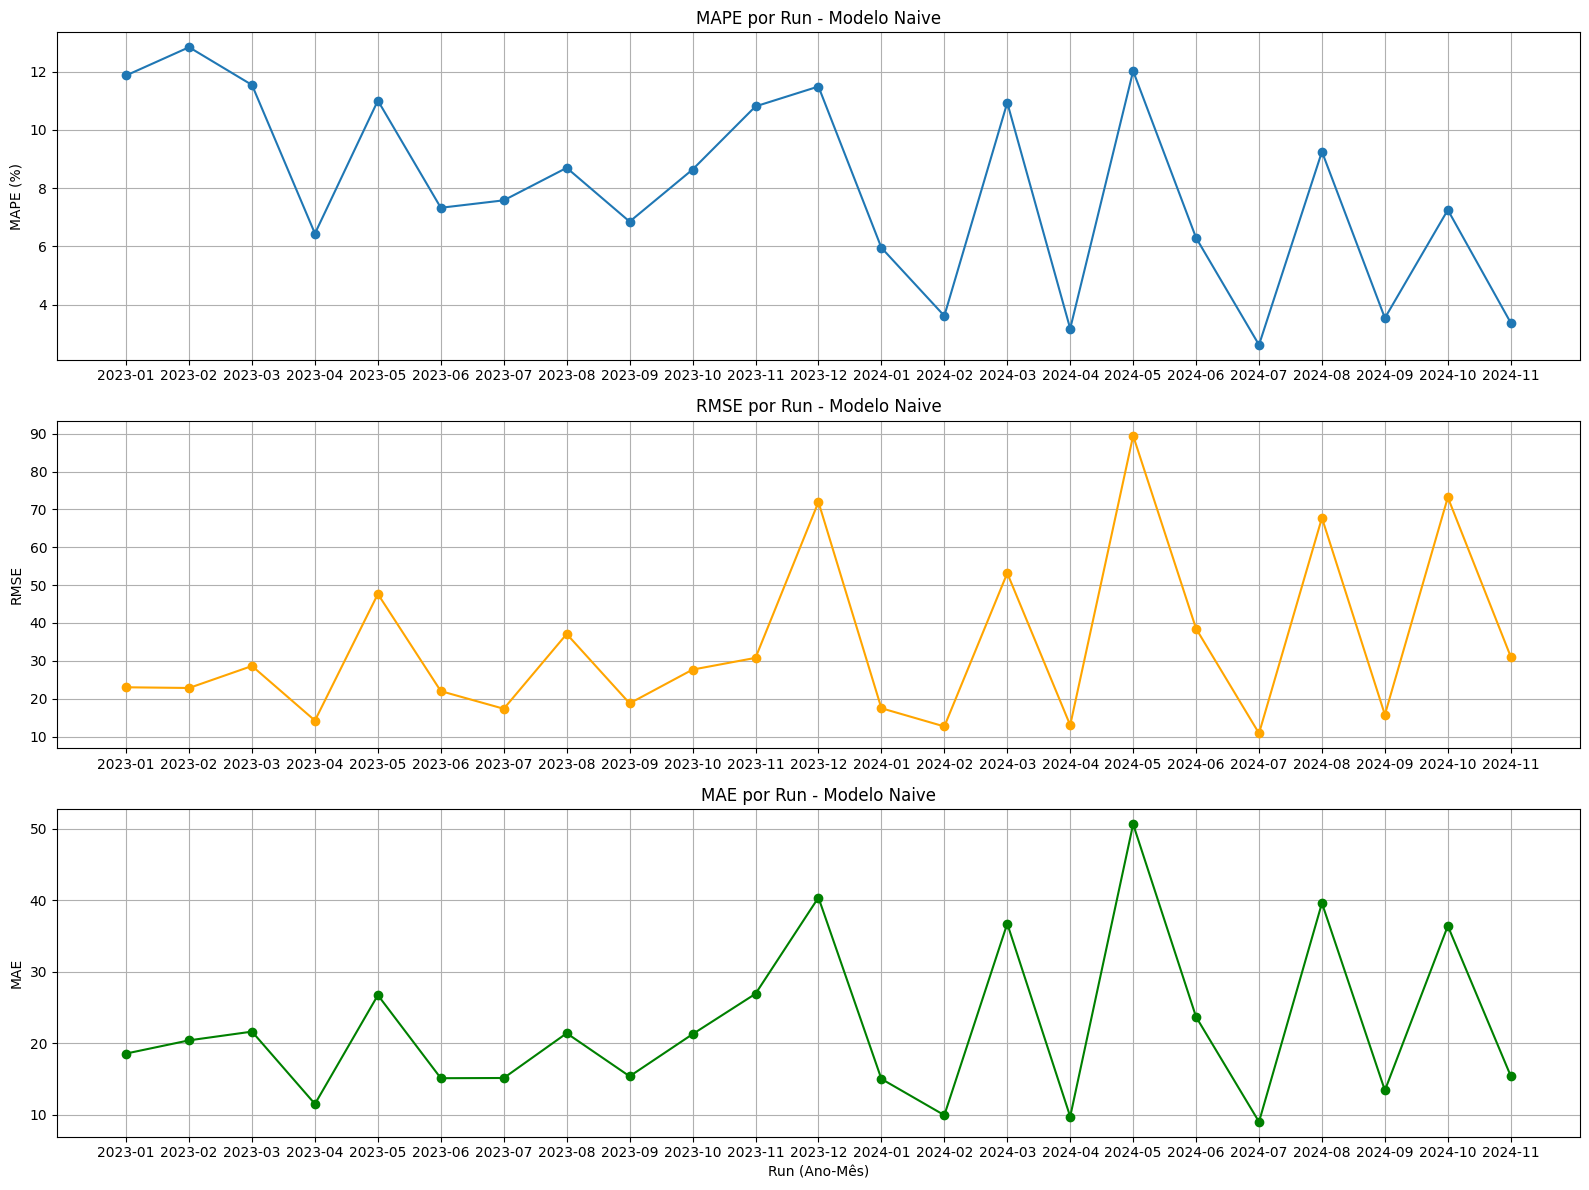

/tmp/ipython-input-43-330957031.py:109: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


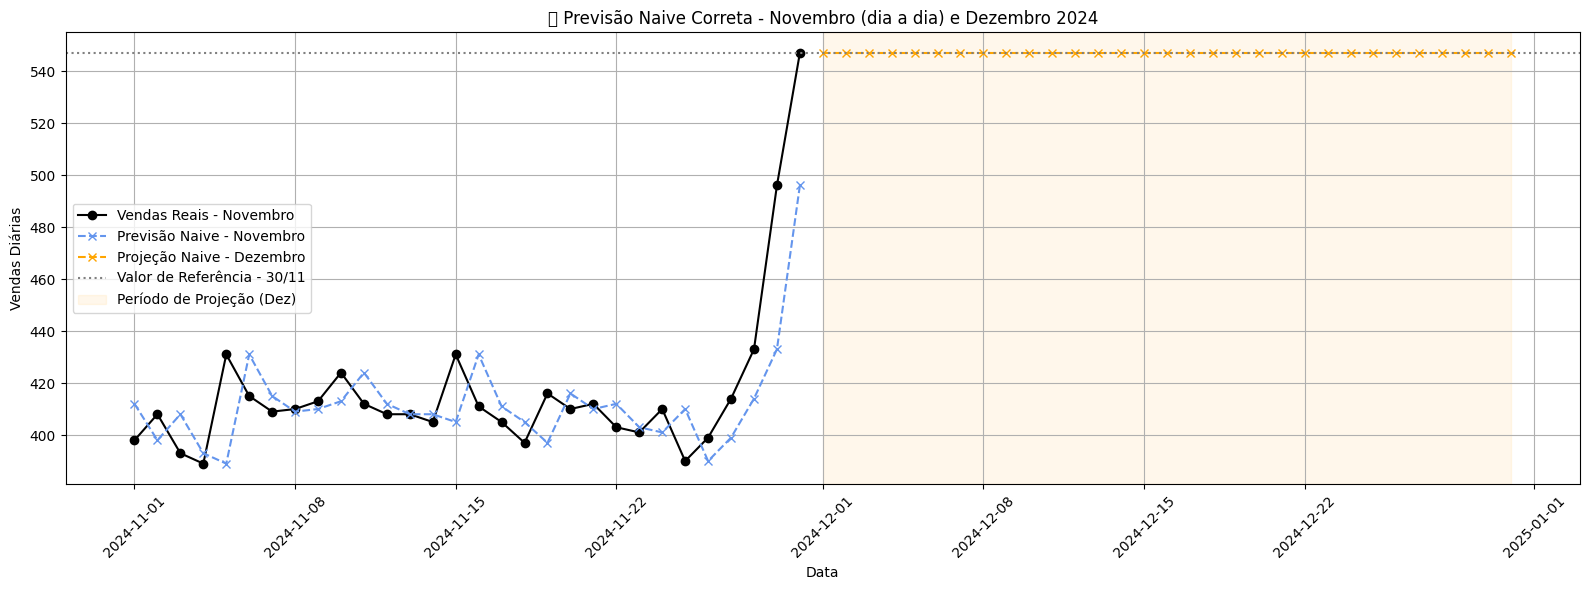

In [43]:
# 📦 Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📌 Função para métricas
def calcular_metricas(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return mape, rmse, mae

# 🔁 Validação cruzada Naive (23 runs)
resultados_naive = []
datas_inicio = pd.date_range(start='2023-01-01', periods=23, freq='MS')

for inicio in datas_inicio:
    inicio_treino = inicio - pd.DateOffset(months=12)
    fim_treino = inicio - pd.DateOffset(days=1)
    fim_teste = inicio + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    if fim_teste > df.index.max():
        continue

    y_real = df.loc[inicio:fim_teste, 'Vendas_Camisetas_básicas_masculinas']
    y_prev = [df.loc[fim_treino, 'Vendas_Camisetas_básicas_masculinas']] * len(y_real)

    mape, rmse, mae = calcular_metricas(y_real, y_prev)

    resultados_naive.append({
        'Run': f'{inicio.strftime("%Y-%m")}',
        'MAPE': mape,
        'RMSE': rmse,
        'MAE': mae
    })

df_naive_resultados = pd.DataFrame(resultados_naive)

# 📊 Gráficos de desempenho por Run
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.plot(df_naive_resultados['Run'], df_naive_resultados['MAPE'], marker='o')
plt.title('MAPE por Run - Modelo Naive')
plt.ylabel('MAPE (%)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df_naive_resultados['Run'], df_naive_resultados['RMSE'], marker='o', color='orange')
plt.title('RMSE por Run - Modelo Naive')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df_naive_resultados['Run'], df_naive_resultados['MAE'], marker='o', color='green')
plt.title('MAE por Run - Modelo Naive')
plt.xlabel('Run (Ano-Mês)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

# ✅ VARIÁVEL 1: Previsão Naive para Novembro (com dados reais)
serie_real_nov = df.loc['2024-10-31':'2024-11-30', 'Vendas_Camisetas_básicas_masculinas'].copy()
serie_prev_nov = serie_real_nov.shift(1).dropna()  # Naive diário: previsão de t = valor de t-1

vendas_previsao = pd.DataFrame({
    'Data': serie_prev_nov.index,
    'Vendas_Reais': serie_real_nov.loc[serie_prev_nov.index].values,
    'Vendas_Previstas': serie_prev_nov.values
})

# ✅ VARIÁVEL 2: Projeção Naive para Dezembro (sem dados reais)
ultimo_valor_novembro = df.loc['2024-11-30', 'Vendas_Camisetas_básicas_masculinas']
datas_dez = pd.date_range(start='2024-12-01', end='2024-12-31')

venda_projecao = pd.DataFrame({
    'Data': datas_dez,
    'Vendas_Previstas': [ultimo_valor_novembro] * 31
})

# ✅ GRÁFICO COMPARATIVO
plt.figure(figsize=(16,6))

# Vendas reais novembro
plt.plot(vendas_previsao['Data'], vendas_previsao['Vendas_Reais'], color='black', marker='o', label='Vendas Reais - Novembro')

# Previsão naive novembro
plt.plot(vendas_previsao['Data'], vendas_previsao['Vendas_Previstas'], color='cornflowerblue', linestyle='--', marker='x', label='Previsão Naive - Novembro')

# Projeção naive dezembro
plt.plot(venda_projecao['Data'], venda_projecao['Vendas_Previstas'], color='orange', linestyle='--', marker='x', label='Projeção Naive - Dezembro')

# Linha horizontal: valor fixo da projeção de dezembro
plt.axhline(ultimo_valor_novembro, linestyle='dotted', color='gray', label='Valor de Referência - 30/11')

# Área sombreada: dezembro
plt.axvspan(pd.to_datetime('2024-12-01'), pd.to_datetime('2024-12-31'), color='orange', alpha=0.08, label='Período de Projeção (Dez)')

# Estética
plt.title('📊 Previsão Naive Correta - Novembro (dia a dia) e Dezembro 2024')
plt.xlabel('Data')
plt.ylabel('Vendas Diárias')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


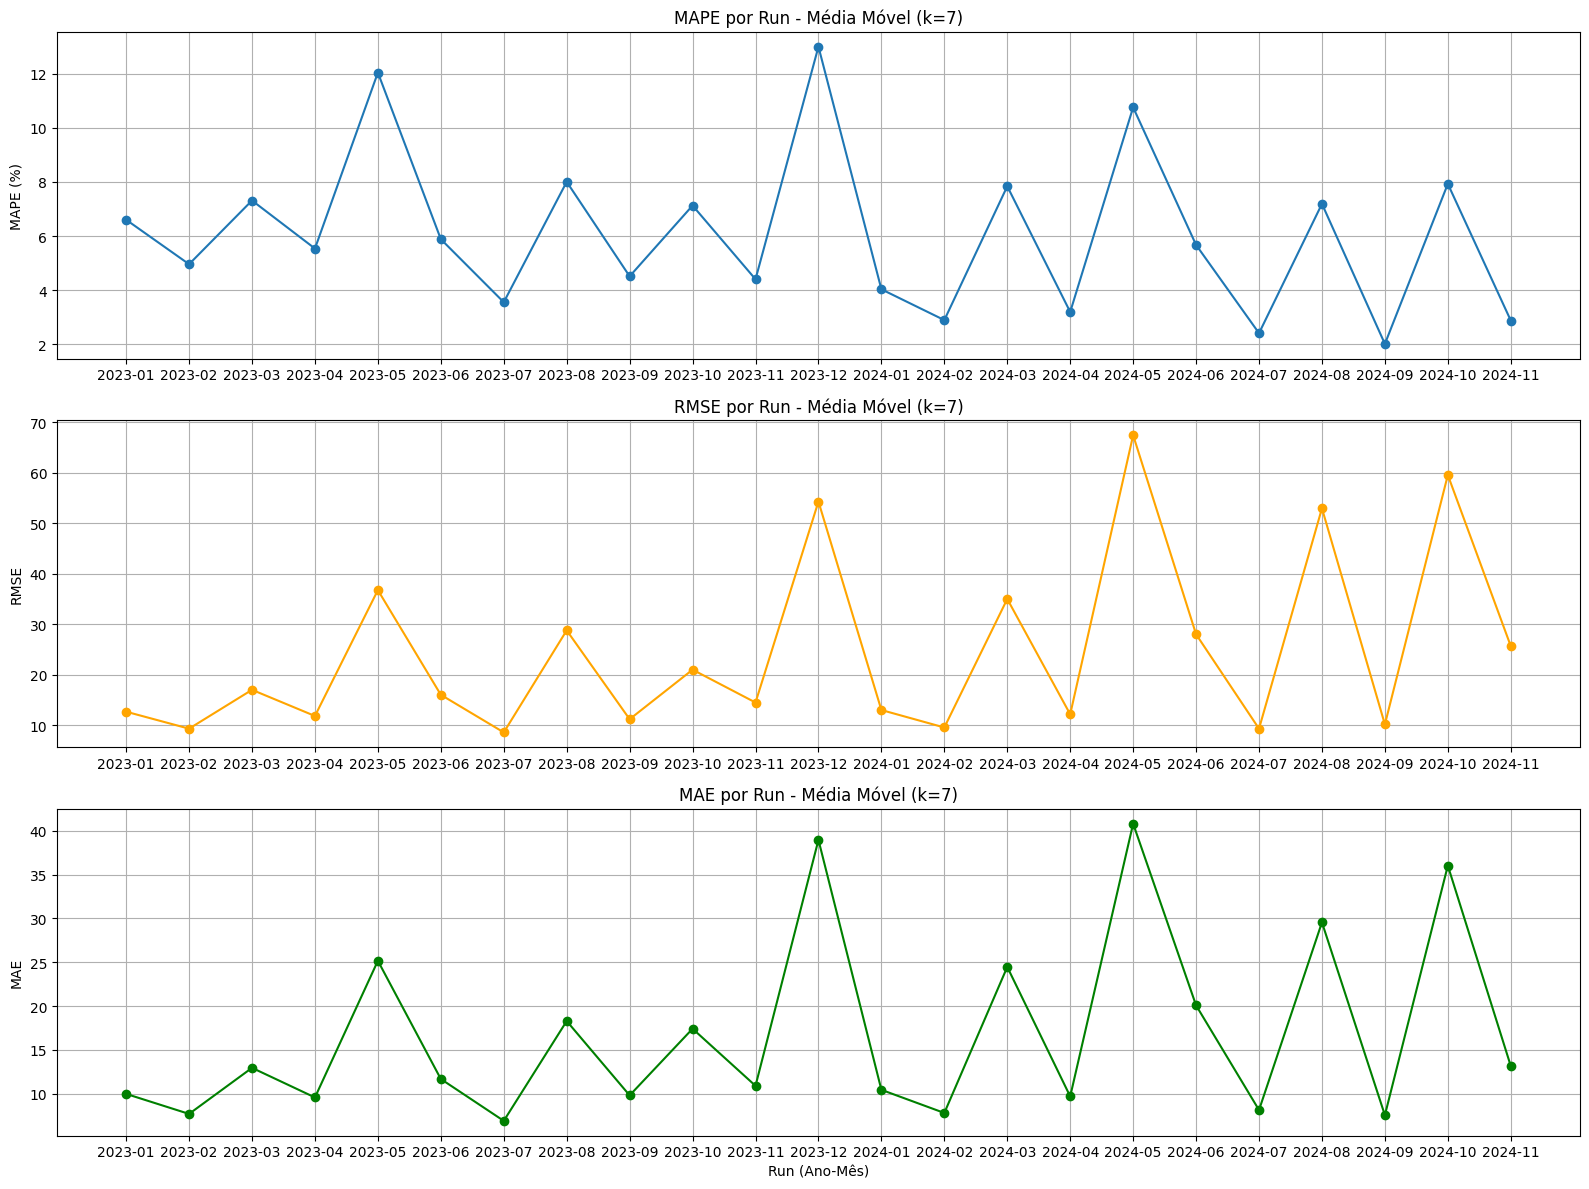

In [44]:
# Reimportar bibliotecas e reler os dados após o reset de ambiente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.dates as mdates


# ✅ Janela da média móvel
k = 7

# ================================
# 📌 VARIÁVEL 1: Previsão novembro
# ================================

# Série de vendas de outubro + novembro (para permitir cálculo do início da janela)
serie_real_nov_full = df.loc['2024-10-01':'2024-11-30', 'Vendas_Camisetas_básicas_masculinas'].copy()

# Calcular a média móvel para os dias de novembro (não recursiva)
media_movel_nov = serie_real_nov_full.rolling(window=k).mean().loc['2024-11-01':'2024-11-30']

# Alinhar com os valores reais de novembro para avaliação
vendas_reais_nov = df.loc['2024-11-01':'2024-11-30', 'Vendas_Camisetas_básicas_masculinas']

vendas_previsao = pd.DataFrame({
    'Data': media_movel_nov.index,
    'Vendas_Reais': vendas_reais_nov.loc[media_movel_nov.index].values,
    'Vendas_Previstas': media_movel_nov.values
})

# ================================
# 📌 VARIÁVEL 2: Projeção dezembro
# ================================

# 🔁 Validação cruzada com média móvel (janela expansiva) — 23 runs
resultados_mm = []
datas_inicio = pd.date_range(start='2023-01-01', periods=23, freq='MS')

for inicio in datas_inicio:
    inicio_treino = inicio - pd.DateOffset(months=12)
    fim_treino = inicio - pd.DateOffset(days=1)
    fim_teste = inicio + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Garantir que a janela de treino tenha dados suficientes
    if fim_teste > df.index.max():
        continue

    # Selecionar série com pelo menos k dias antes do início da previsão
    serie_full = df.loc[inicio_treino - pd.DateOffset(days=k-1):fim_teste, 'Vendas_Camisetas_básicas_masculinas'].copy()

    # Calcular a média móvel para o mês de teste (não recursiva)
    previsao = serie_full.rolling(window=k).mean().loc[inicio:fim_teste]

    # Valores reais correspondentes
    reais = df.loc[inicio:fim_teste, 'Vendas_Camisetas_básicas_masculinas']

    # Ajustar intervalo (descartar primeiros dias se rolling não completou janela)
    comuns = previsao.dropna().index.intersection(reais.index)

    if len(comuns) == 0:
        continue

    y_pred = previsao.loc[comuns]
    y_true = reais.loc[comuns]

    # Calcular métricas
    mape, rmse, mae = calcular_metricas(y_true, y_pred)

    resultados_mm.append({
        'Run': f'{inicio.strftime("%Y-%m")}',
        'MAPE': mape,
        'RMSE': rmse,
        'MAE': mae
    })

df_mm_runs = pd.DataFrame(resultados_mm)

# 📈 Gráficos das métricas por Run
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.plot(df_mm_runs['Run'], df_mm_runs['MAPE'], marker='o', label='MAPE')
plt.title('MAPE por Run - Média Móvel (k=7)')
plt.ylabel('MAPE (%)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df_mm_runs['Run'], df_mm_runs['RMSE'], marker='o', color='orange', label='RMSE')
plt.title('RMSE por Run - Média Móvel (k=7)')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df_mm_runs['Run'], df_mm_runs['MAE'], marker='o', color='green', label='MAE')
plt.title('MAE por Run - Média Móvel (k=7)')
plt.xlabel('Run (Ano-Mês)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()



/tmp/ipython-input-45-599994809.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


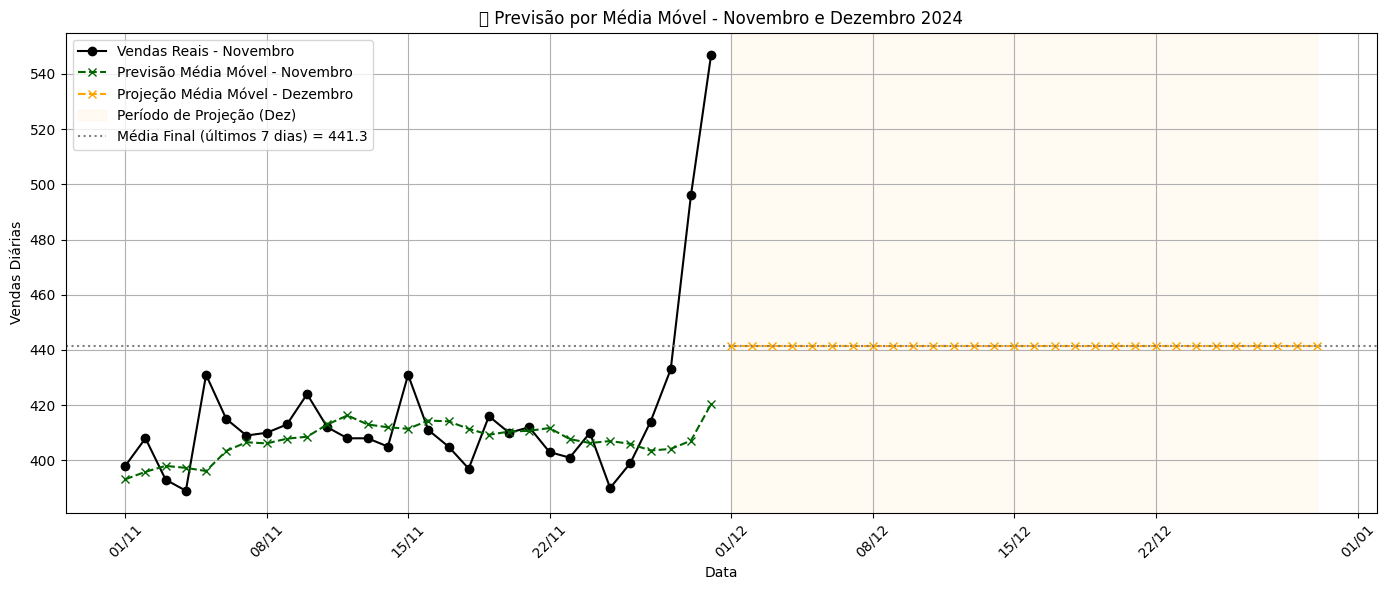

((15.923809523809524,
  np.float64(30.608411097800758),
  np.float64(3.483724217238137)),
 2024-12-01    441.285714
 2024-12-02    441.285714
 2024-12-03    441.285714
 2024-12-04    441.285714
 2024-12-05    441.285714
 Freq: D, dtype: float64)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.dates as mdates

# Define the target series
serie = df['Vendas_Camisetas_básicas_masculinas']

# 🔁 Definir janelas de treino e teste
inicio_treino = '2023-10-01'
fim_treino = '2024-10-31'
inicio_teste = '2024-11-01'
fim_teste = '2024-11-30'
inicio_proj = '2024-12-01'
fim_proj = '2024-12-30'

treino = serie[inicio_treino:fim_treino]
teste = serie[inicio_teste:fim_teste]
M = 7  # janela de média móvel

# 🔮 Previsão para novembro com média móvel
previsao_novembro_mm = []
serie_full = pd.concat([treino, teste])  # inclui dados até 30/11

for i in range(len(teste)):
    janela = serie_full.iloc[len(treino) + i - M:len(treino) + i]
    previsao = janela.mean() if len(janela) == M else np.nan
    previsao_novembro_mm.append(previsao)

previsao_novembro_mm = pd.Series(previsao_novembro_mm, index=teste.index).dropna()
teste_mm = teste[previsao_novembro_mm.index]

# 🔮 Projeção para dezembro com última média móvel de novembro
media_final_mm = serie_full[-M:].mean()
datas_dezembro = pd.date_range(start=inicio_proj, end=fim_proj, freq='D')
previsao_dezembro_mm = pd.Series(media_final_mm, index=datas_dezembro)

# 📏 Avaliação
mae_mm = mean_absolute_error(teste_mm, previsao_novembro_mm)
rmse_mm = np.sqrt(mean_squared_error(teste_mm, previsao_novembro_mm))
mape_mm = np.mean(np.abs((teste_mm - previsao_novembro_mm) / teste_mm)) * 100

# 📊 Gráfico
plt.figure(figsize=(14, 6))
plt.plot(teste.index, teste, label='Vendas Reais - Novembro', color='black', marker='o')
plt.plot(previsao_novembro_mm.index, previsao_novembro_mm, label='Previsão Média Móvel - Novembro', linestyle='--', color='darkgreen', marker='x')
plt.plot(previsao_dezembro_mm.index, previsao_dezembro_mm, label='Projeção Média Móvel - Dezembro', linestyle='--', color='orange', marker='x')
plt.axvspan(previsao_dezembro_mm.index[0], previsao_dezembro_mm.index[-1], color='orange', alpha=0.05, label='Período de Projeção (Dez)')
plt.axhline(media_final_mm, color='gray', linestyle=':', label=f'Média Final (últimos {M} dias) = {media_final_mm:.1f}')
plt.title('📊 Previsão por Média Móvel - Novembro e Dezembro 2024')
plt.xlabel('Data')
plt.ylabel('Vendas Diárias')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

(mae_mm, rmse_mm, mape_mm), previsao_dezembro_mm.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


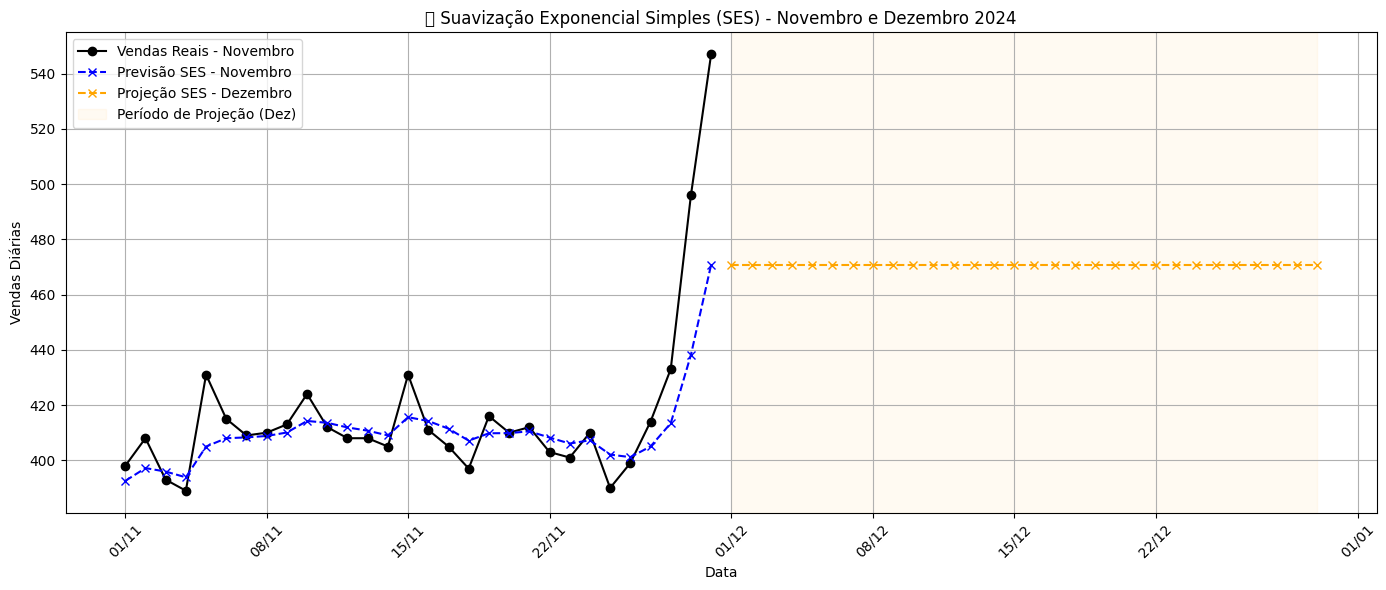

(10.55971130891847,
 np.float64(19.41162685061342),
 np.float64(2.3251086714721603))

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


# Definir série alvo
serie = df['Vendas_Camisetas_básicas_masculinas']

# Janela de treino: 01/10/2024 a 31/10/2024
treino_ses = serie['2024-10-01':'2024-10-31']
# Janela de teste: novembro
teste_ses = serie['2024-11-01':'2024-11-30']
# Janela de previsão: dezembro
datas_dezembro = pd.date_range(start='2024-12-01', end='2024-12-30', freq='D')

# Treinar modelo SES
modelo_ses = SimpleExpSmoothing(treino_ses, initialization_method="heuristic").fit(smoothing_level=0.3, optimized=False)

# Fazer previsão para novembro (passo a passo dia a dia)
predicoes_novembro = []
suavizados = []
prev = modelo_ses.fittedvalues.iloc[-1]
for i in range(len(teste_ses)):
    nova_obs = teste_ses.iloc[i]
    prev = modelo_ses.model.params['smoothing_level'] * nova_obs + (1 - modelo_ses.model.params['smoothing_level']) * prev
    suavizados.append(prev)
    predicoes_novembro.append(prev)

# Calcular métricas
mae = mean_absolute_error(teste_ses, predicoes_novembro)
rmse = np.sqrt(mean_squared_error(teste_ses, predicoes_novembro))
mape = np.mean(np.abs((teste_ses.values - predicoes_novembro) / teste_ses.values)) * 100

# Previsão para dezembro (continua o último valor suavizado)
prev_dezembro = [suavizados[-1]] * len(datas_dezembro)
previsao_dezembro = pd.Series(prev_dezembro, index=datas_dezembro)

# Plotar resultados
plt.figure(figsize=(14, 6))
plt.plot(teste_ses.index, teste_ses, label='Vendas Reais - Novembro', color='black', marker='o')
plt.plot(teste_ses.index, predicoes_novembro, label='Previsão SES - Novembro', linestyle='--', color='blue', marker='x')
plt.plot(previsao_dezembro.index, previsao_dezembro, label='Projeção SES - Dezembro', linestyle='--', color='orange', marker='x')
plt.axvspan(previsao_dezembro.index[0], previsao_dezembro.index[-1], color='orange', alpha=0.05, label='Período de Projeção (Dez)')
plt.title('📊 Suavização Exponencial Simples (SES) - Novembro e Dezembro 2024')
plt.xlabel('Data')
plt.ylabel('Vendas Diárias')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tabela com resultado para exportação e conferência
resultado_df = pd.DataFrame({
    'Data': teste_ses.index,
    'Vendas': teste_ses.values,
    'Suave': suavizados,
    'Erro': np.round(teste_ses.values - np.array(suavizados), 2),
    'Predição': [np.nan] + suavizados[:-1]
})

mae, rmse, mape

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

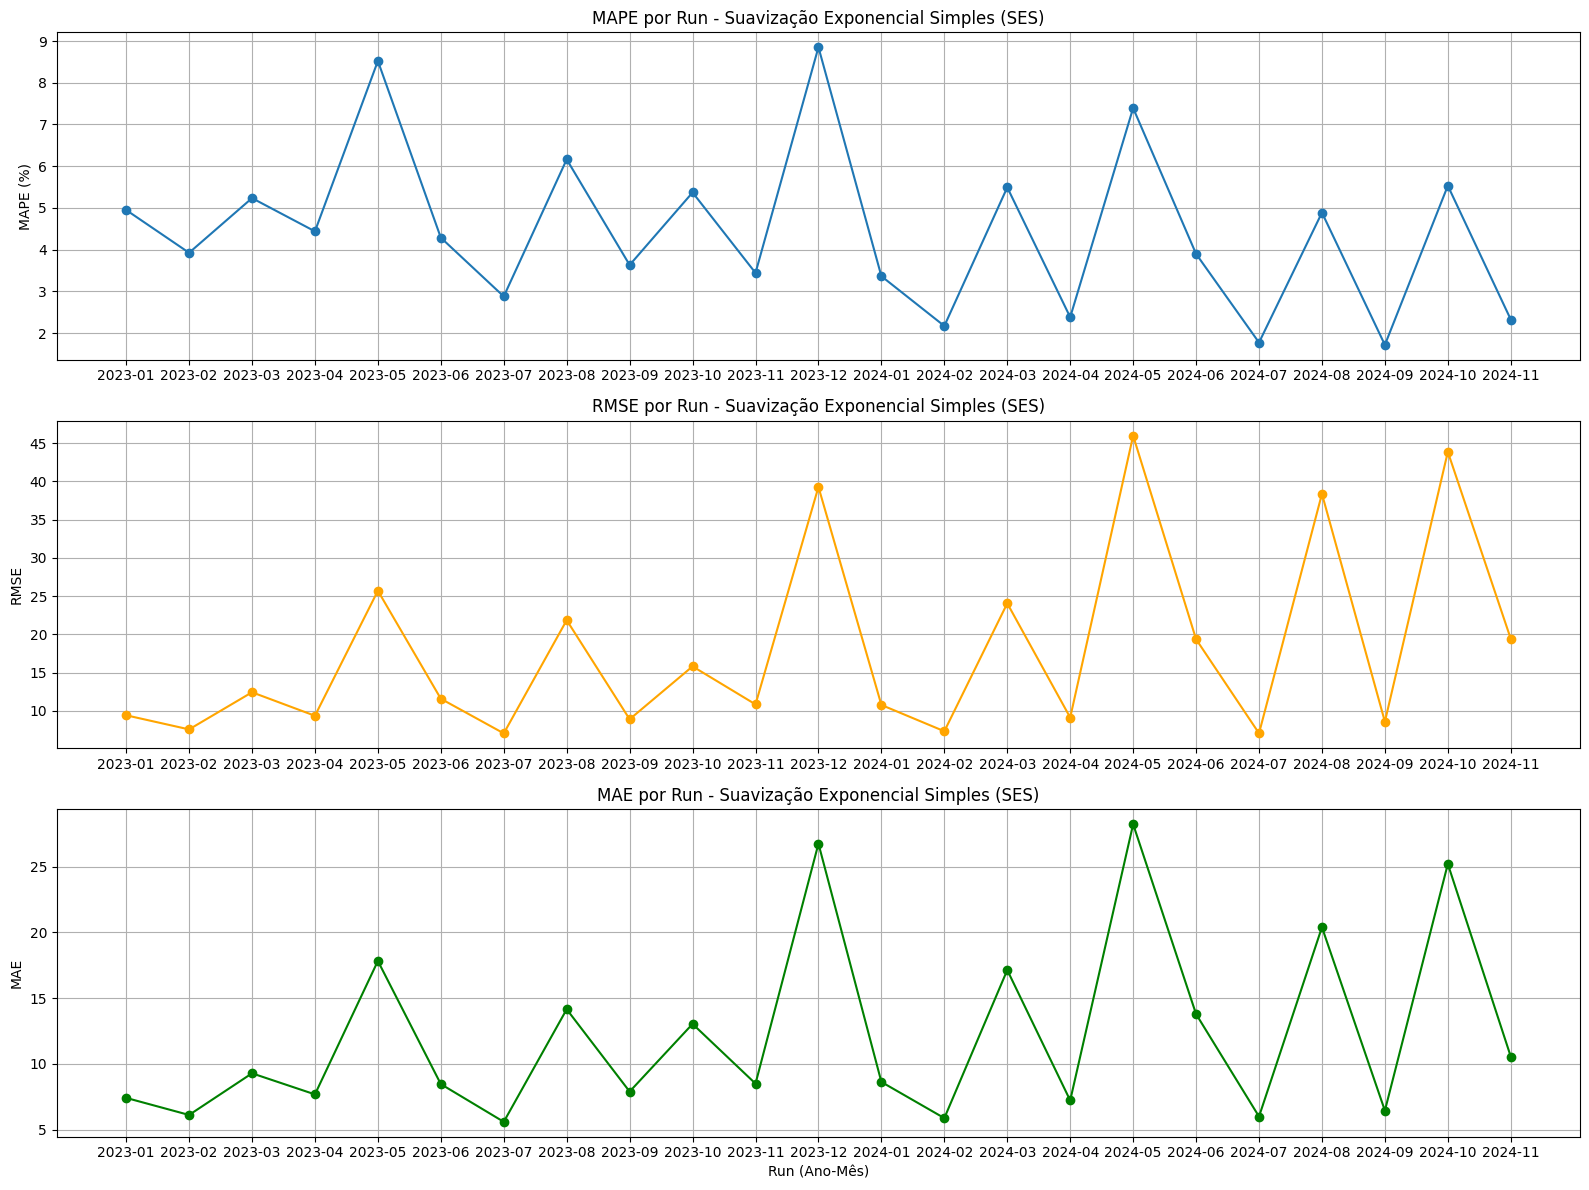

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Garantir datetime index
df.index = pd.to_datetime(df.index)

# Série alvo
serie = df['Vendas_Camisetas_básicas_masculinas']

# Parâmetro fixo
alpha = 0.3

# Armazenar métricas por run
resultados_ses = []
datas_inicio = pd.date_range(start='2023-01-01', periods=23, freq='MS')

# Loop pelas execuções
for inicio in datas_inicio:
    inicio_treino = inicio - pd.DateOffset(months=12)
    fim_treino = inicio - pd.DateOffset(days=1)
    fim_teste = inicio + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    if fim_teste > serie.index.max():
        continue

    treino = serie.loc[inicio_treino:fim_treino]
    teste = serie.loc[inicio:fim_teste]

    # Evitar erros por séries curtas
    if len(treino) < 2 or len(teste) < 2:
        continue

    modelo_ses = SimpleExpSmoothing(treino, initialization_method="heuristic").fit(smoothing_level=alpha, optimized=False)

    # Previsão recursiva SES para o mês de teste
    prev = modelo_ses.fittedvalues.iloc[-1]
    preds = []
    for i in range(len(teste)):
        nova_obs = teste.iloc[i]
        prev = alpha * nova_obs + (1 - alpha) * prev
        preds.append(prev)

    # Métricas
    mape = np.mean(np.abs((teste.values - preds) / teste.values)) * 100
    rmse = np.sqrt(mean_squared_error(teste, preds))
    mae = mean_absolute_error(teste, preds)

    resultados_ses.append({
        'Run': f'{inicio.strftime("%Y-%m")}',
        'MAPE': mape,
        'RMSE': rmse,
        'MAE': mae
    })

# Converter para DataFrame
df_ses_runs = pd.DataFrame(resultados_ses)


# Garantir ordenação correta
df_ses_runs = df_ses_runs.sort_values("Run")

# 📈 Gráficos das métricas por Run
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.plot(df_ses_runs['Run'], df_ses_runs['MAPE'], marker='o')
plt.title('MAPE por Run - Suavização Exponencial Simples (SES)')
plt.ylabel('MAPE (%)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df_ses_runs['Run'], df_ses_runs['RMSE'], marker='o', color='orange')
plt.title('RMSE por Run - Suavização Exponencial Simples (SES)')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df_ses_runs['Run'], df_ses_runs['MAE'], marker='o', color='green')
plt.title('MAE por Run - Suavização Exponencial Simples (SES)')
plt.xlabel('Run (Ano-Mês)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()


In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Selecionar a série alvo
serie = df['Vendas_Camisetas_básicas_masculinas']

# Janela de treino: Outubro/2024
treino_ses = serie['2024-10-01':'2024-10-31']

# Janela de teste: Novembro/2024
teste_ses = serie['2024-11-01':'2024-11-30']

# Projeção: Dezembro/2024
datas_dezembro = pd.date_range(start='2024-12-01', end='2024-12-31', freq='D')

# Treinar o modelo SES
alpha = 0.3
modelo_ses = SimpleExpSmoothing(treino_ses, initialization_method="heuristic").fit(smoothing_level=alpha, optimized=False)

# Previsão dia a dia para novembro (atualizando suavização com dados reais)
predicoes_novembro = []
suavizados = []
prev = modelo_ses.fittedvalues.iloc[-1]

for i in range(len(teste_ses)):
    nova_obs = teste_ses.iloc[i]
    prev = alpha * nova_obs + (1 - alpha) * prev
    suavizados.append(prev)
    predicoes_novembro.append(prev)

# Projeção de dezembro com último valor suavizado
prev_dezembro = [suavizados[-1]] * len(datas_dezembro)
previsao_dezembro = pd.Series(prev_dezembro, index=datas_dezembro)

# Criar DataFrame para tabela final
tabela_resultado_ses = pd.DataFrame({
    'Data': list(teste_ses.index) + list(datas_dezembro),
    'Vendas_Reais': list(teste_ses.values) + [None]*31,
    'Previsao_SES': predicoes_novembro + prev_dezembro
})

# Exibir a tabela final
display(tabela_resultado_ses)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Data,Vendas_Reais,Previsao_SES
0,2024-11-01,398.0,392.548971
1,2024-11-02,408.0,397.184280
2,2024-11-03,393.0,395.928996
3,2024-11-04,389.0,393.850297
4,2024-11-05,431.0,404.995208
...,...,...,...
56,2024-12-27,NaN,470.828381
57,2024-12-28,NaN,470.828381
58,2024-12-29,NaN,470.828381
59,2024-12-30,NaN,470.828381


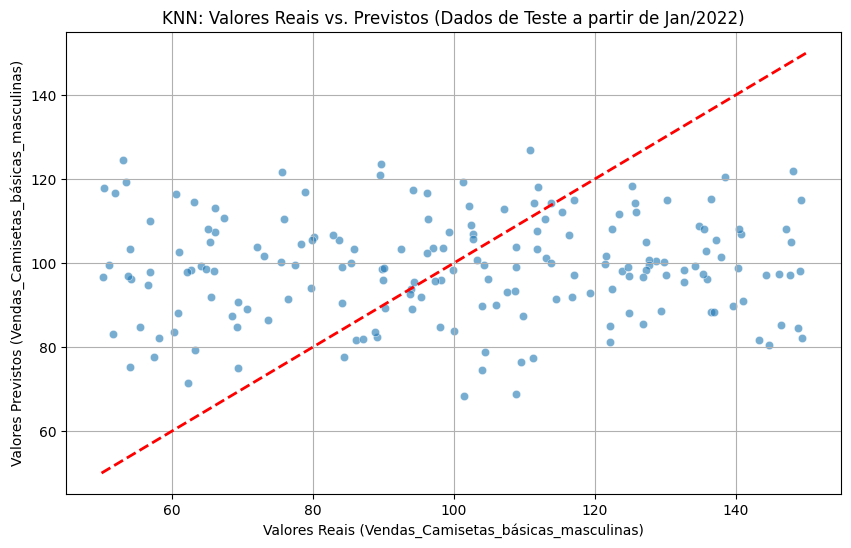

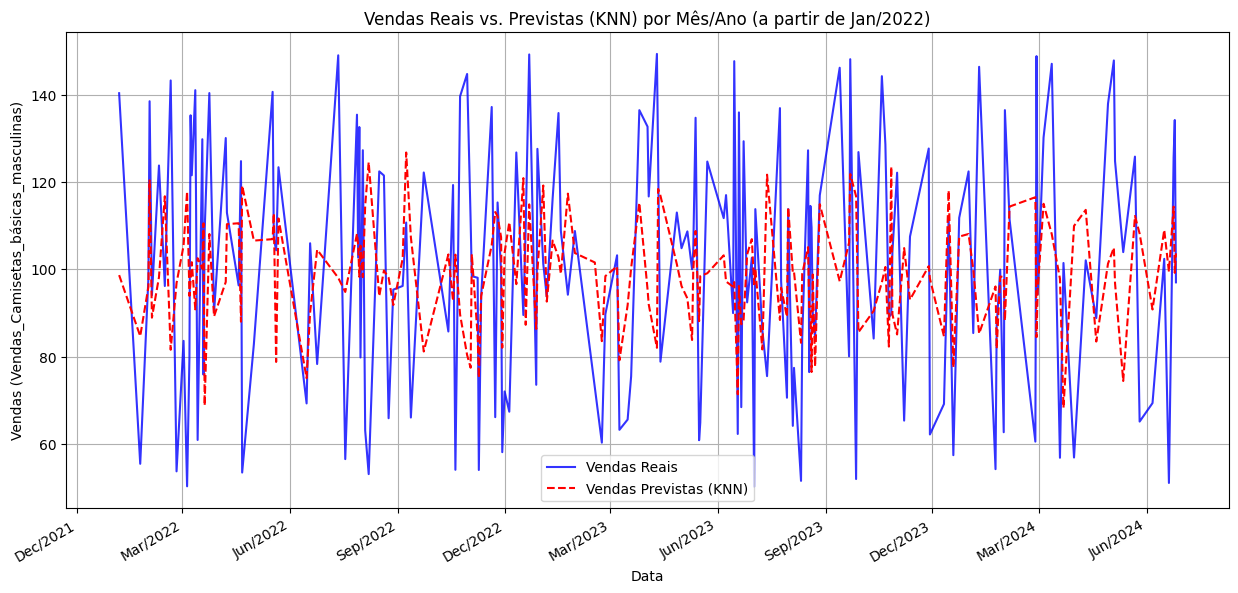

/tmp/ipython-input-49-201103087.py:157: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_errors = df_test_results.groupby('AnoMes').apply(


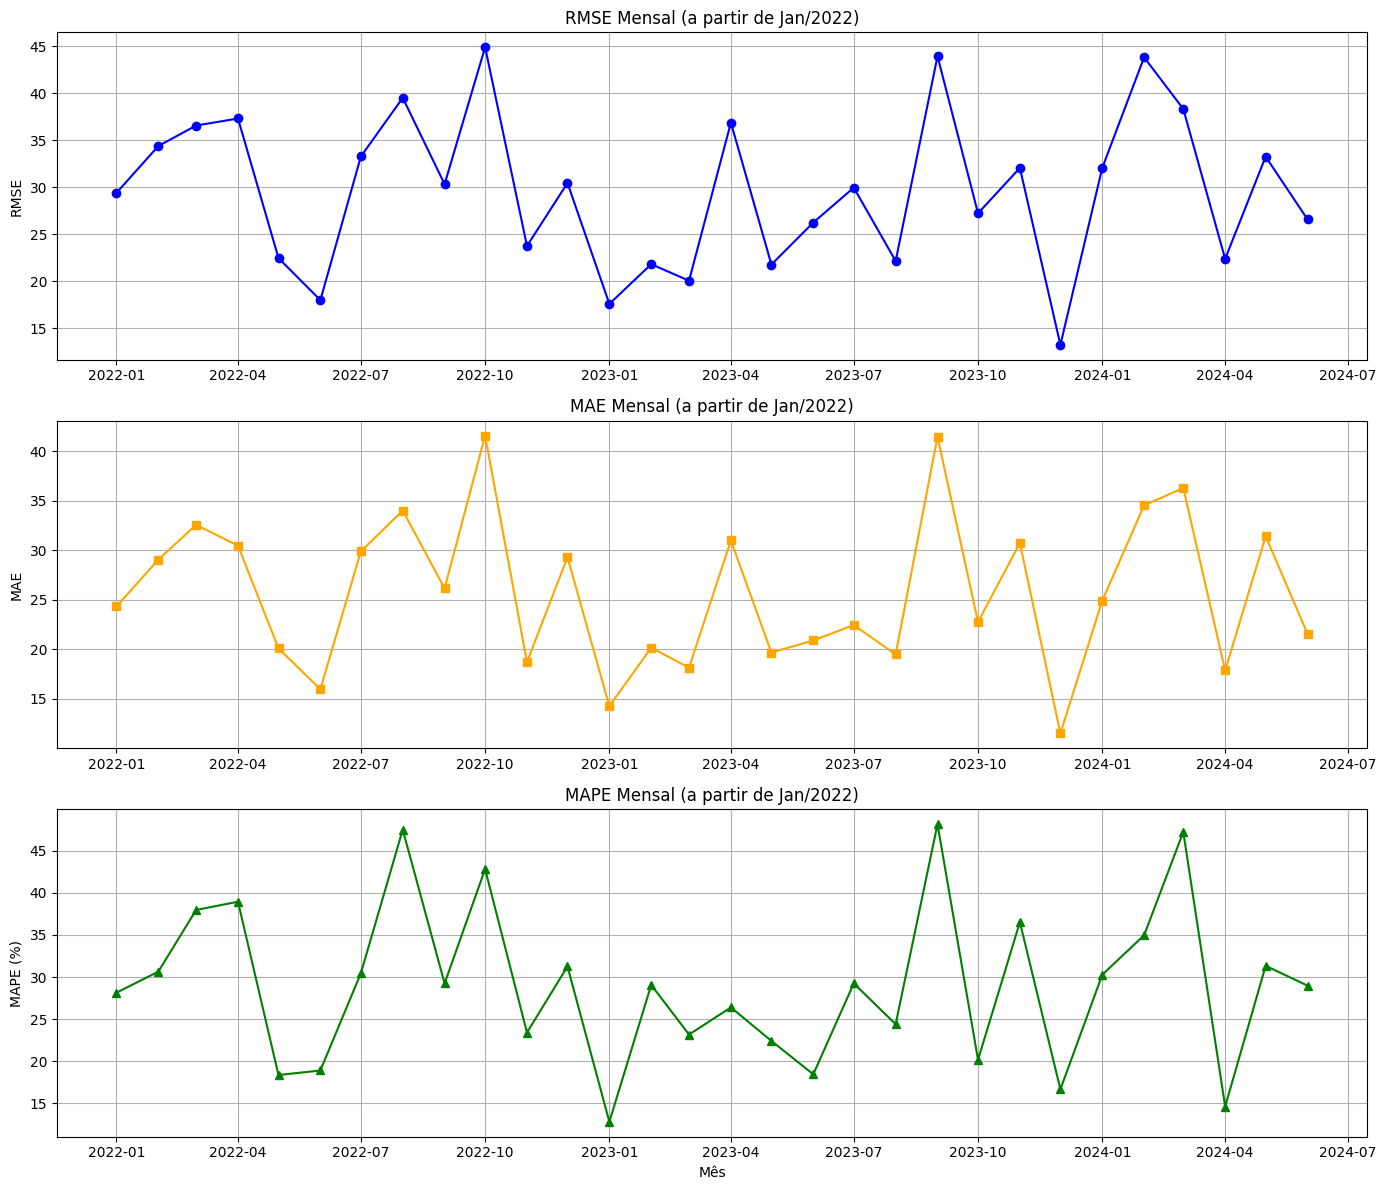


--- Métricas de Erro para o Conjunto de Teste (Geral) ---
MAE Geral: 25.67
RMSE Geral: 30.74
MAPE Geral: 29.09%


In [49]:
# 1. Importar as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Para formatar o eixo de datas

# 2. Funções para cálculo das métricas de erro
def calcular_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def calcular_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calcular_mape(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)

    non_zero_mask = y_true_np != 0
    if np.any(non_zero_mask):
        mape_values = np.abs((y_true_np[non_zero_mask] - y_pred_np[non_zero_mask]) / y_true_np[non_zero_mask])
        return np.mean(mape_values) * 100
    else:
        return np.nan # Retorna NaN se todos os valores reais forem zero


np.random.seed(42)
dates = pd.date_range(start='2021-01-01', end='2024-06-30', freq='D')
n_rows = len(dates)
data = {
    'Data': dates,
    'Ano': dates.year,
    'Mês': dates.month,
    'Dia': dates.day,
    'Dia_da_Semana': dates.dayofweek, # 0=Monday, 6=Sunday
    'Domingo': (dates.dayofweek == 6).astype(int),
    'Segunda-feira': (dates.dayofweek == 0).astype(int),
    'Terça-feira': (dates.dayofweek == 1).astype(int),
    'Quarta-feira': (dates.dayofweek == 2).astype(int),
    'Quinta-feira': (dates.dayofweek == 3).astype(int),
    'Sexta-feira': (dates.dayofweek == 4).astype(int),
    'Sábado': (dates.dayofweek == 5).astype(int),
    'Data_Importante': np.random.randint(0, 2, n_rows), # Exemplo de flag binária
    'Vendas_Camisetas_básicas_masculinas': np.random.rand(n_rows) * 100 + 50 # Variável alvo
}
# Adicionar Lags (valores aleatórios para o dummy, na sua planilha já estarão calculados)
for i in range(1, 16):
    data[f'Vendas_Lag{i}'] = np.random.rand(n_rows) * 100 + np.random.randint(-10,10)
df = pd.DataFrame(data)
# --- FIM DO EXEMPLO DUMMY ---


# Assegure-se que a coluna 'Data' está em formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# 3. Filtrar dados a partir de janeiro de 2022
df_filtered = df[df['Data'] >= '2022-01-01'].copy() # Use .copy() para evitar SettingWithCopyWarning

# Verifique se há dados após o filtro
if df_filtered.empty:
    print("Não há dados após o filtro de janeiro de 2022. Verifique sua coluna 'Data' e o filtro.")
else:
    # 4. Definir Features (X) e Variável Alvo (y)
    target_column = 'Vendas_Camisetas_básicas_masculinas'

    # Lista de features (colunas de entrada para o modelo)
    # Certifique-se de que todas essas colunas existem no seu DataFrame
    features = [
        'Ano', 'Mês', 'Dia',
        'Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado',
        'Data_Importante',
        'Vendas_Lag1', 'Vendas_Lag2', 'Vendas_Lag3', 'Vendas_Lag4', 'Vendas_Lag5',
        'Vendas_Lag6', 'Vendas_Lag7', 'Vendas_Lag8', 'Vendas_Lag9', 'Vendas_Lag10',
        'Vendas_Lag11', 'Vendas_Lag12', 'Vendas_Lag13', 'Vendas_Lag14', 'Vendas_Lag15'
    ]

    # Remova colunas que não existam no seu DF filtrado (caso alguma feature não esteja presente)
    features_present = [f for f in features if f in df_filtered.columns]
    if len(features_present) < len(features):
        missing_features = set(features) - set(features_present)
        print(f"Aviso: As seguintes colunas de feature não foram encontradas no DataFrame e serão ignoradas: {missing_features}")

    X = df_filtered[features_present]
    y = df_filtered[target_column]

    # Tratamento de valores NaN (se houver) - Preenchimento com a média das colunas

    # 5. Dividir dados em treino e teste

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 6. Escalar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 7. Treinar o modelo KNN

    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train_scaled, y_train)

    # Fazer previsões
    y_pred = knn_model.predict(X_test_scaled)

    # 8. Criar DataFrame de Resultados de Teste para análises e plotagem

    df_test_results = df_filtered.loc[y_test.index].copy() # Pega as linhas originais do df_filtered que foram para o teste
    df_test_results['Previsto'] = y_pred
    df_test_results['Real'] = y_test

    # Ordenar por data para o gráfico de linha temporal
    df_test_results = df_test_results.sort_values(by='Data').reset_index(drop=True)

    # Criar a coluna 'AnoMes' para agrupar por mês
    df_test_results['AnoMes'] = df_test_results['Data'].dt.to_period('M')

    # --- 9. Gerar Gráficos ---

    # Gráfico 1: KNN (Valores Reais vs. Previstos) - Dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Linha de 45 graus para referência
    plt.xlabel(f'Valores Reais ({target_column})')
    plt.ylabel(f'Valores Previstos ({target_column})')
    plt.title(f'KNN: Valores Reais vs. Previstos (Dados de Teste a partir de Jan/2022)')
    plt.grid(True)
    plt.show()

    # NOVO GRÁFICO: KNN Mês a Mês (Valores Reais vs. Previstos) - Linha Temporal
    plt.figure(figsize=(15, 7))
    plt.plot(df_test_results['Data'], df_test_results['Real'], label='Vendas Reais', color='blue', alpha=0.8)
    plt.plot(df_test_results['Data'], df_test_results['Previsto'], label='Vendas Previstas (KNN)', color='red', linestyle='--')

    plt.title(f'Vendas Reais vs. Previstas (KNN) por Mês/Ano (a partir de Jan/2022)')
    plt.xlabel('Data')
    plt.ylabel(f'Vendas ({target_column})')
    plt.legend()
    plt.grid(True)

    # Formatando o eixo X para mostrar Mês e Ano

    locator = mdates.MonthLocator(interval=3)
    # Formatter para exibir o mês e o ano
    formatter = mdates.DateFormatter('%b/%Y')
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate() # Rotação automática das datas para melhor visualização

    plt.show()


    # Cálculo das métricas mensalmente para os gráficos de erro
    monthly_errors = df_test_results.groupby('AnoMes').apply(
        lambda g: pd.Series({
            'RMSE': calcular_rmse(g['Real'], g['Previsto']),
            'MAE': calcular_mae(g['Real'], g['Previsto']),
            'MAPE': calcular_mape(g['Real'], g['Previsto'])
        })
    ).reset_index()

    # Converter 'AnoMes' de volta para timestamp para plotagem
    monthly_errors['AnoMes'] = monthly_errors['AnoMes'].dt.to_timestamp()

    # Gráfico de Erros Mensais (RMSE, MAE, MAPE)
    plt.figure(figsize=(14, 12))

    plt.subplot(3, 1, 1)
    plt.plot(monthly_errors['AnoMes'], monthly_errors['RMSE'], marker='o', color='blue')
    plt.title('RMSE Mensal (a partir de Jan/2022)')
    plt.ylabel('RMSE')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(monthly_errors['AnoMes'], monthly_errors['MAE'], marker='s', color='orange')
    plt.title('MAE Mensal (a partir de Jan/2022)')
    plt.ylabel('MAE')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(monthly_errors['AnoMes'], monthly_errors['MAPE'], marker='^', color='green')
    plt.title('MAPE Mensal (a partir de Jan/2022)')
    plt.ylabel('MAPE (%)')
    plt.xlabel('Mês')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\n--- Métricas de Erro para o Conjunto de Teste (Geral) ---")
    print(f"MAE Geral: {calcular_mae(y_test, y_pred):.2f}")
    print(f"RMSE Geral: {calcular_rmse(y_test, y_pred):.2f}")
    print(f"MAPE Geral: {calcular_mape(y_test, y_pred):.2f}%")



===== Avaliando Modelo SVM =====

--- Métricas de Erro SVM (Geral) ---
MAE Geral: 24.82
RMSE Geral: 29.59
MAPE Geral: 28.41%


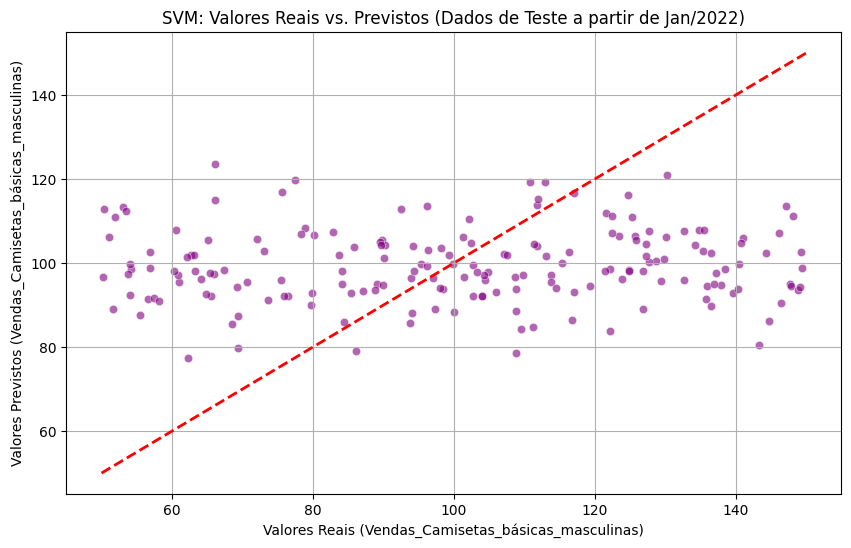

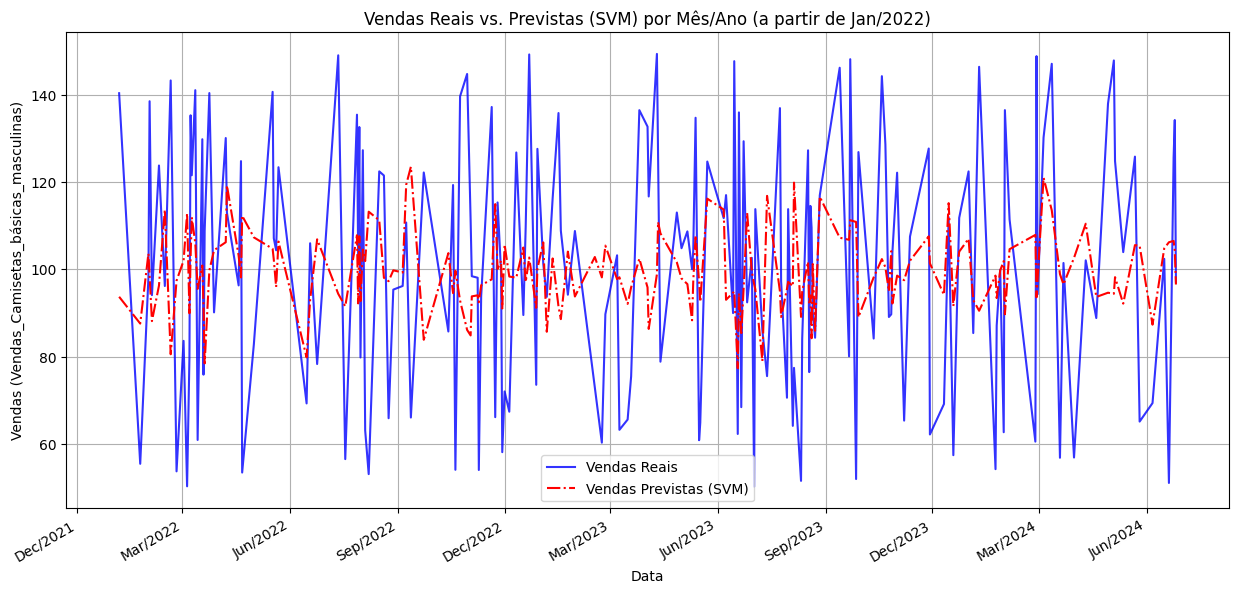

/tmp/ipython-input-50-1457311315.py:111: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_errors_svm = df_test_results_svm.groupby('AnoMes').apply(


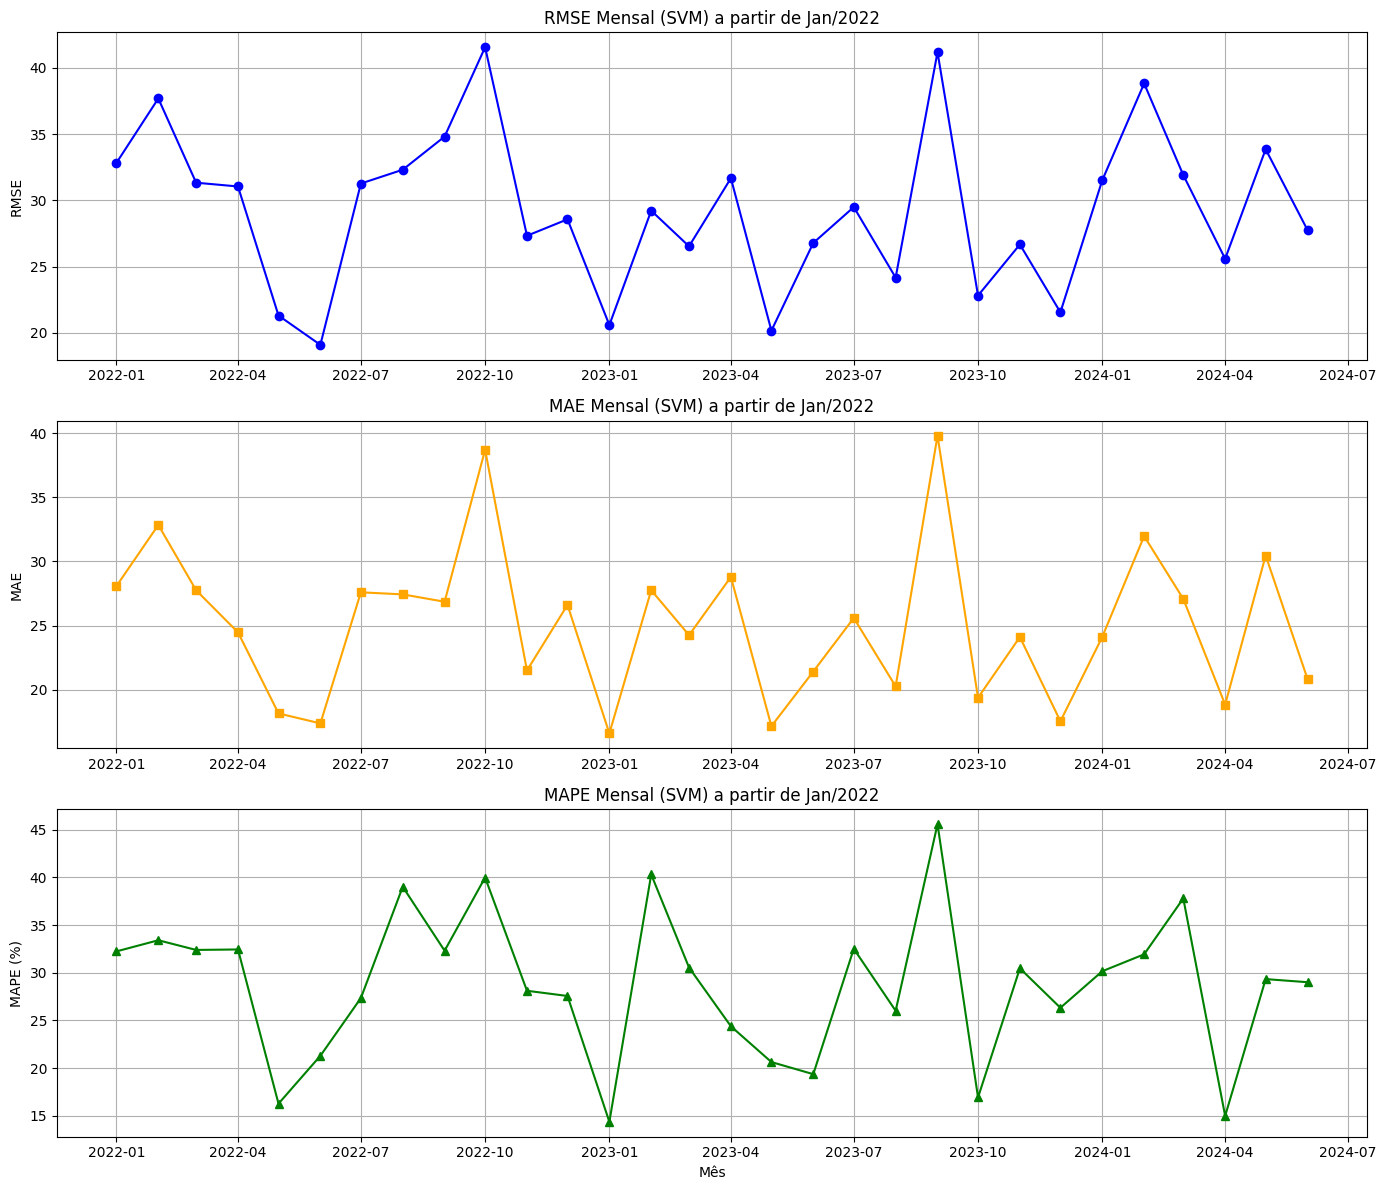

In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Para formatar o eixo de datas
from sklearn.svm import SVR # Importando SVR

# Funções para cálculo das métricas de erro (assumindo que já estão definidas em outro lugar ou serão definidas aqui)
# Se estas funções já existem, remova as definições duplicadas.
def calcular_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def calcular_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calcular_mape(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)

    non_zero_mask = y_true_np != 0
    if np.any(non_zero_mask):
        mape_values = np.abs((y_true_np[non_zero_mask] - y_pred_np[non_zero_mask]) / y_true_np[non_zero_mask])
        return np.mean(mape_values) * 100
    else:
        return np.nan


# Assumindo que df_filtered, X_train_scaled, X_test_scaled, y_train, y_test, target_column e df_filtered.loc[y_test.index]
# já foram definidos e estão disponíveis no ambiente.
# Se não estiverem, as células anteriores que os definem precisam ser executadas primeiro.

# Exemplo dummy de df_filtered e y (REMOVA ISSO SE ESTIVER USANDO SEUS DADOS REAIS DE UMA CÉLULA ANTERIOR)
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# np.random.seed(42)
# dates = pd.date_range(start='2022-01-01', end='2024-06-30', freq='D')
# n_rows = len(dates)
# data = {
#     'Data': dates,
#     'Vendas_Camisetas_básicas_masculinas': np.random.rand(n_rows) * 100 + 50,
#     'Ano': dates.year, 'Mês': dates.month, 'Dia': dates.day, 'Dia_da_Semana': dates.dayofweek,
#     'Domingo': (dates.dayofweek == 6).astype(int), 'Segunda-feira': (dates.dayofweek == 0).astype(int),
#     'Terça-feira': (dates.dayofweek == 1).astype(int), 'Quarta-feira': (dates.dayofweek == 2).astype(int),
#     'Quinta-feira': (dates.dayofweek == 3).astype(int), 'Sexta-feira': (dates.dayofweek == 4).astype(int),
#     'Sábado': (dates.dayofweek == 5).astype(int), 'Data_Importante': np.random.randint(0, 2, n_rows),
# }
# for i in range(1, 16): data[f'Vendas_Lag{i}'] = np.random.rand(n_rows) * 100
# df_filtered = pd.DataFrame(data).set_index('Data').sort_index()
# target_column = 'Vendas_Camisetas_básicas_masculinas'
# features = [col for col in df_filtered.columns if col != target_column]
# X = df_filtered[features]
# y = df_filtered[target_column]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


print("\n\n===== Avaliando Modelo SVM =====")
# Inicialize e treine o modelo SVR.
# O kernel 'rbf' (Radial Basis Function) é comum.
# C e gamma são hiperparâmetros que podem ser ajustados para melhor desempenho.
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train_scaled, y_train)

# Fazer previsões com o SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Criar DataFrame de Resultados de Teste para SVM
df_test_results_svm = df_filtered.loc[y_test.index].copy()
df_test_results_svm['Previsto'] = y_pred_svm
df_test_results_svm['Real'] = y_test
df_test_results_svm = df_test_results_svm.sort_values(by='Data').reset_index(drop=True)
df_test_results_svm['AnoMes'] = df_test_results_svm['Data'].dt.to_period('M')

# Métricas de Erro SVM (Geral)
print("\n--- Métricas de Erro SVM (Geral) ---")
print(f"MAE Geral: {calcular_mae(y_test, y_pred_svm):.2f}")
print(f"RMSE Geral: {calcular_rmse(y_test, y_pred_svm):.2f}")
print(f"MAPE Geral: {calcular_mape(y_test, y_pred_svm):.2f}%")

# Gráfico SVM (Valores Reais vs. Previstos) - Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svm, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel(f'Valores Reais ({target_column})')
plt.ylabel(f'Valores Previstos ({target_column})')
plt.title(f'SVM: Valores Reais vs. Previstos (Dados de Teste a partir de Jan/2022)')
plt.grid(True)
plt.show()

# Gráfico SVM Mês a Mês (Valores Reais vs. Previstos) - Linha Temporal
plt.figure(figsize=(15, 7))
plt.plot(df_test_results_svm['Data'], df_test_results_svm['Real'], label='Vendas Reais', color='blue', alpha=0.8)
plt.plot(df_test_results_svm['Data'], df_test_results_svm['Previsto'], label='Vendas Previstas (SVM)', color='red', linestyle='-.')
plt.title(f'Vendas Reais vs. Previstas (SVM) por Mês/Ano (a partir de Jan/2022)')
plt.xlabel('Data')
plt.ylabel(f'Vendas ({target_column})')
plt.legend()
plt.grid(True)
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%b/%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.show()


# Gráficos de Erro Mensais para SVM (RMSE, MAE, MAPE)
monthly_errors_svm = df_test_results_svm.groupby('AnoMes').apply(
    lambda g: pd.Series({
        'RMSE': calcular_rmse(g['Real'], g['Previsto']),
        'MAE': calcular_mae(g['Real'], g['Previsto']),
        'MAPE': calcular_mape(g['Real'], g['Previsto'])
    })
).reset_index()
monthly_errors_svm['AnoMes'] = monthly_errors_svm['AnoMes'].dt.to_timestamp()

plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 1)
plt.plot(monthly_errors_svm['AnoMes'], monthly_errors_svm['RMSE'], marker='o', color='blue')
plt.title('RMSE Mensal (SVM) a partir de Jan/2022')
plt.ylabel('RMSE')
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(monthly_errors_svm['AnoMes'], monthly_errors_svm['MAE'], marker='s', color='orange')
plt.title('MAE Mensal (SVM) a partir de Jan/2022')
plt.ylabel('MAE')
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(monthly_errors_svm['AnoMes'], monthly_errors_svm['MAPE'], marker='^', color='green')
plt.title('MAPE Mensal (SVM) a partir de Jan/2022')
plt.ylabel('MAPE (%)')
plt.xlabel('Mês')
plt.grid(True)
plt.tight_layout()
plt.show()

Período de Treino: 2022-01-16 a 2024-05-10 (815 dias)
Período de Teste: 2024-05-11 a 2024-11-30 (204 dias)

===== Iniciando a Otimização de Hiperparâmetros para Random Forest (no conjunto de TREINO) =====
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- Resultados da Otimização de Hiperparâmetros para Random Forest ---
Melhores Hiperparâmetros encontrados: {'max_features': 1.0, 'min_samples_leaf': 5, 'n_estimators': 200}
Melhor MAE (durante a otimização no treino): 21.39

===== Treinando o Random Forest Otimizado no conjunto de TREINO completo e prevendo no conjunto de TESTE e FULL =====

--- Métricas de Erro no Conjunto de TESTE (Random Forest Otimizado) ---
  MAE: 29.75
  RMSE: 42.03
  MAPE: 7.72%


/tmp/ipython-input-51-1539676333.py:188: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_errors = full_period_results_df.groupby('YearMonth').apply(


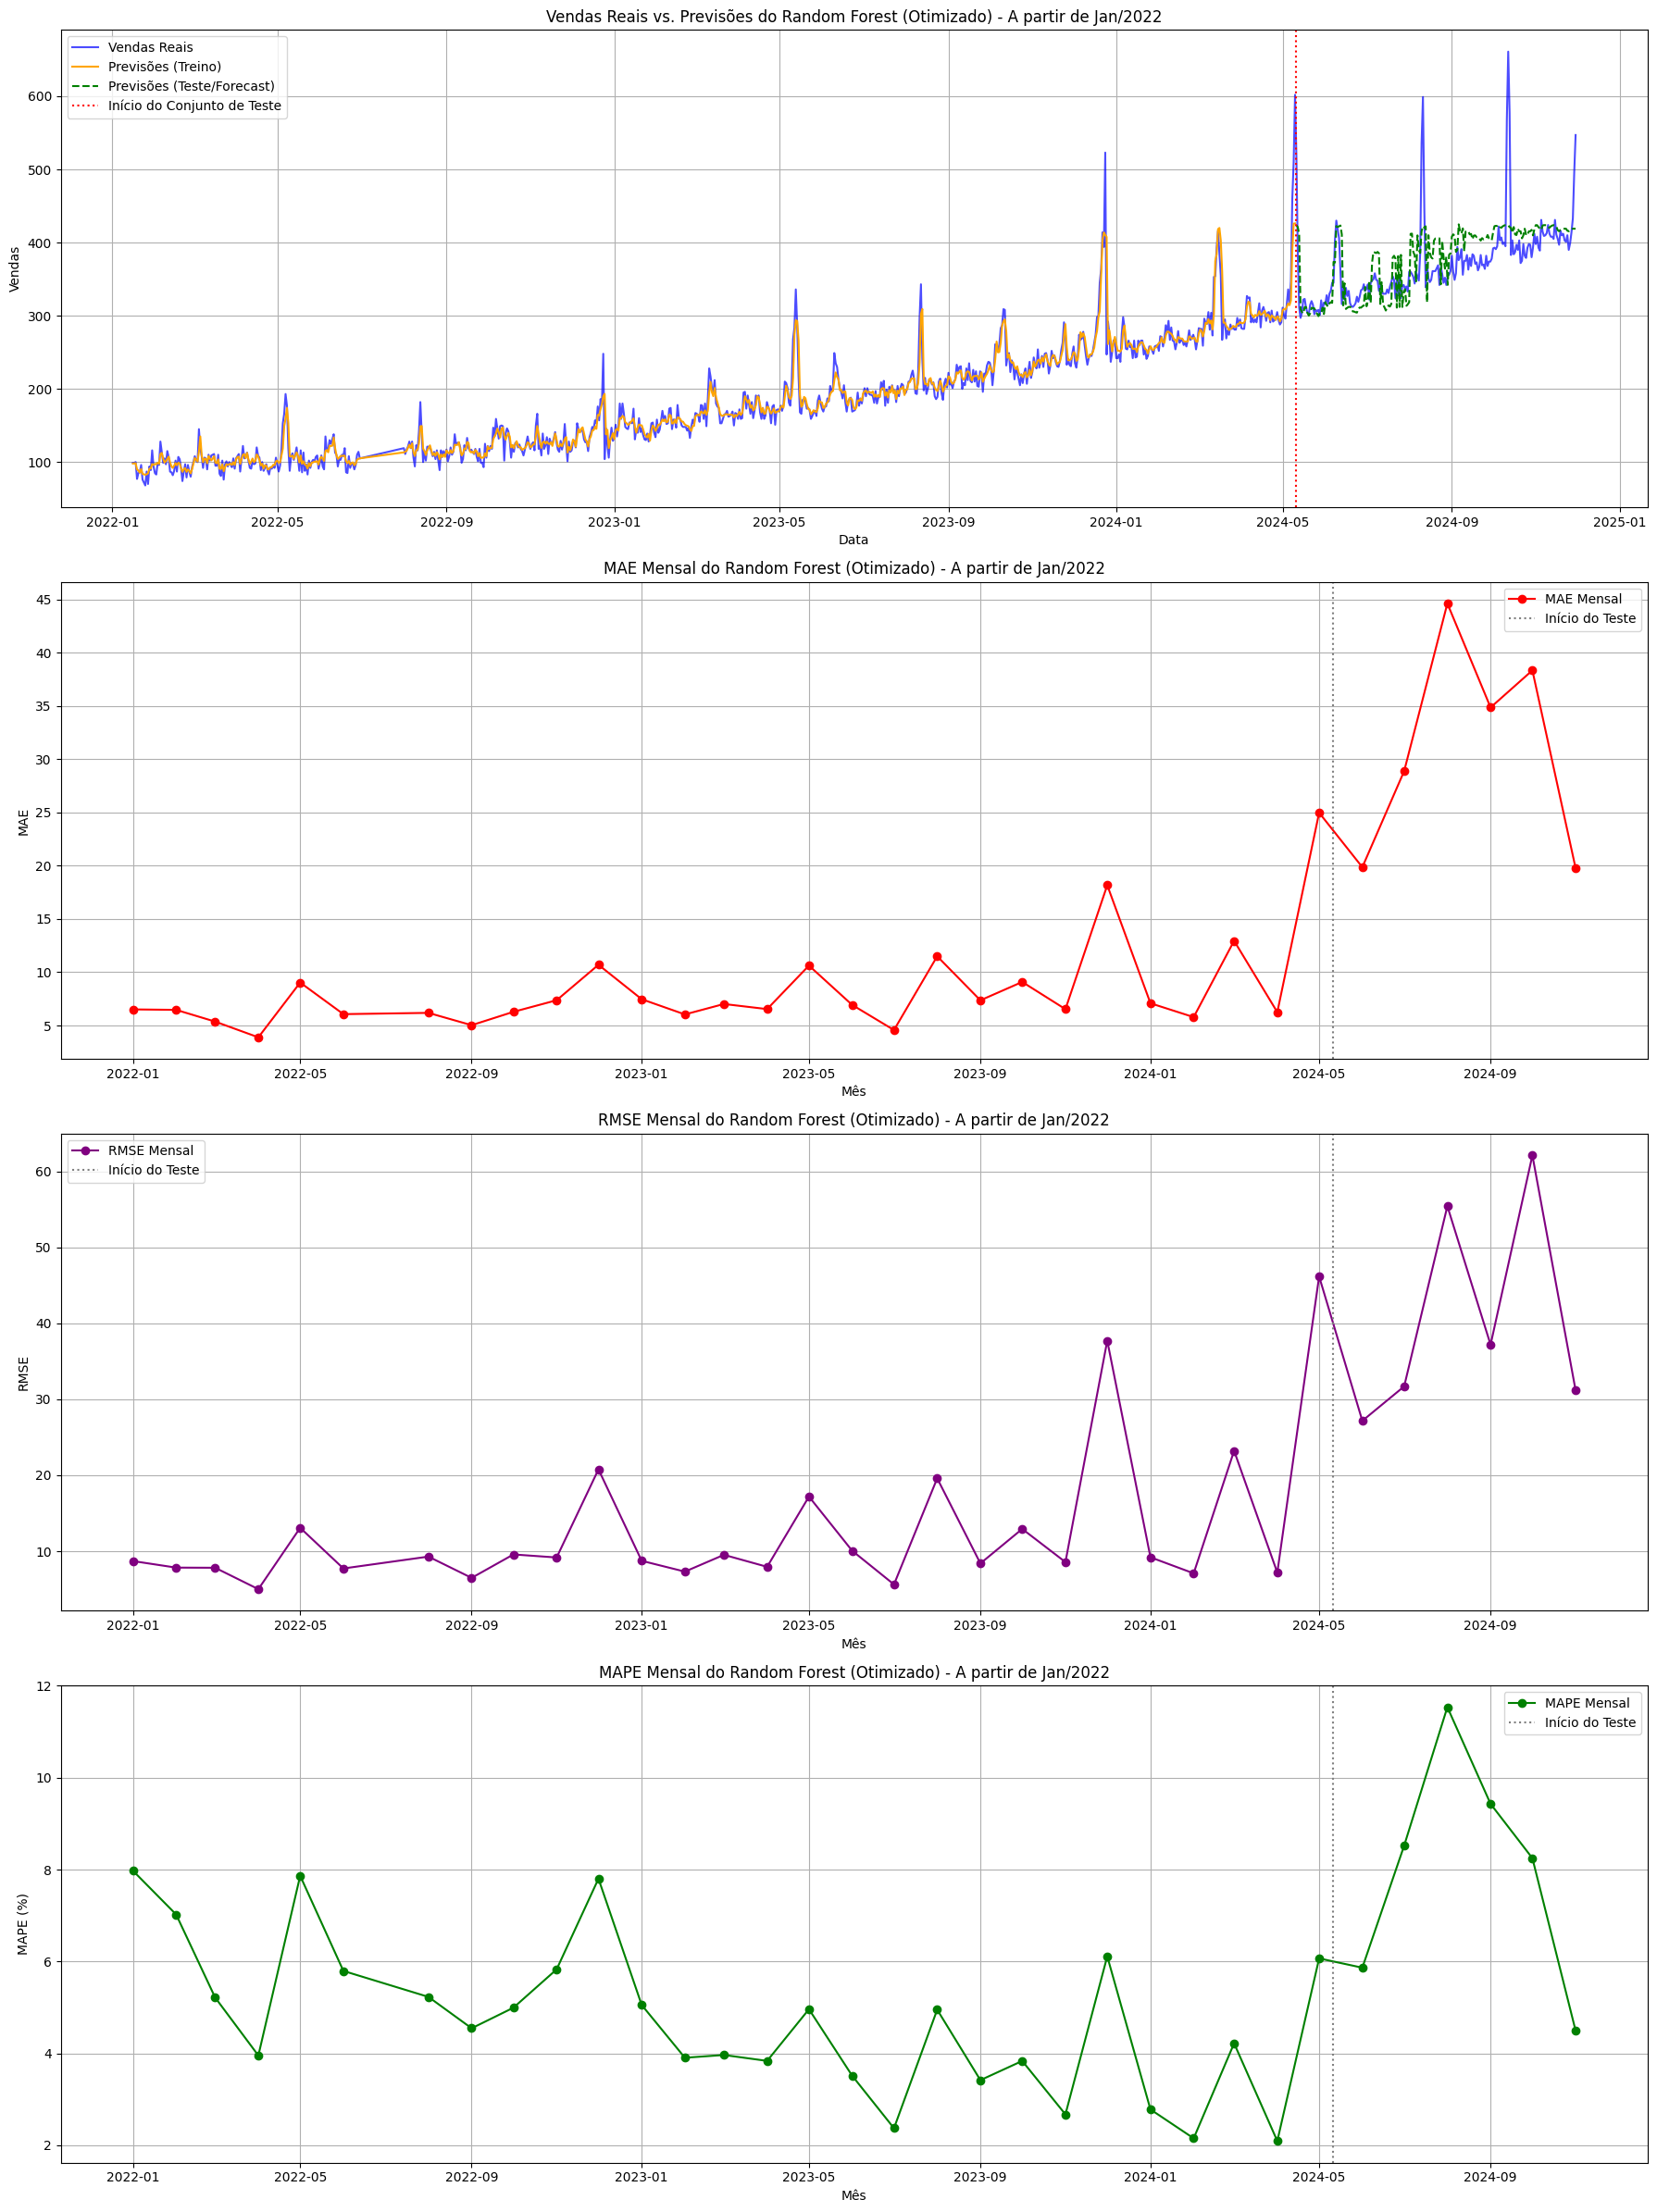

In [51]:
# Instalar bibliotecas necessárias (se ainda não estiverem instaladas no Colab)
# !pip install pandas numpy scikit-learn matplotlib seaborn openpyxl

# 1. Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

# 2. Funções para cálculo das métricas de erro
def calcular_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calcular_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def calcular_mape(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)

    # Evita divisão por zero e inf
    non_zero_mask = y_true_np != 0
    if np.any(non_zero_mask):
        mape_values = np.abs((y_true_np[non_zero_mask] - y_pred_np[non_zero_mask]) / y_true_np[non_zero_mask])
        return np.mean(mape_values) * 100
    else:
        return np.nan # Retorna NaN se todos os valores reais forem zero

# --- SEÇÃO PARA CARREGAR SEUS DADOS ---

file_name = 'Dados_completos.xlsx'

# Exemplo de carregamento, assumindo que o arquivo já foi carregado para o ambiente do Colab ou Drive
try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_name}' não foi encontrado. Por favor, faça upload do arquivo ou verifique o caminho.")
    # Se você estiver no Google Colab e o arquivo não estiver lá, descomente e execute as linhas abaixo para fazer o upload:
    # from google.colab import files
    # uploaded = files = files.upload()
    # file_name_uploaded = list(uploaded.keys())[0]
    # df = pd.read_excel(file_name_uploaded)
    exit()

# Assegure-se que a coluna 'Data' está em formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# Filtrar dados A PARTIR de janeiro de 2022
df_filtered = df[df['Data'] >= '2022-01-01'].copy()

if df_filtered.empty:
    print("Não há dados após o filtro de janeiro de 2022. Verifique sua coluna 'Data' e o filtro.")
    exit()
else:
    # DEFINIR VARIÁVEL ALVO E FEATURES CONFORME A NOVA PLANILHA
    target_column = 'Vendas_Camisetas_básicas_masculinas'

    features = [
        'Ano', 'Mês', 'Dia',
        'Dia_da_Semana', # Assumindo que é numérica ou será tratada
        'Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira',
        'Quinta-feira', 'Sexta-feira', 'Sábado',
        'Data_Importante', # Assumindo que é numérica ou booleana
        'Vendas_Lag1', 'Vendas_Lag2', 'Vendas_Lag3', 'Vendas_Lag4',
        'Vendas_Lag5', 'Vendas_Lag6', 'Vendas_Lag7', 'Vendas_Lag8',
        'Vendas_Lag9', 'Vendas_Lag10', 'Vendas_Lag11', 'Vendas_Lag12',
        'Vendas_Lag13', 'Vendas_Lag14', 'Vendas_Lag15'
    ]

    # Verificar quais features estão realmente presentes no DataFrame
    features_present = [f for f in features if f in df_filtered.columns]
    if len(features_present) < len(features):
        missing_features = set(features) - set(features_present)
        print(f"Aviso: As seguintes colunas de feature não foram encontradas no DataFrame e serão ignoradas: {missing_features}")

    # Remover linhas com valores ausentes nas features ou no target, essencial para os lags
    df_processed = df_filtered.dropna(subset=features_present + [target_column]).copy()

    if df_processed.empty:
        print("Após remover linhas com valores ausentes em features ou no target, o DataFrame está vazio. Verifique seus dados e os lags.")
        exit()

    X = df_processed[features_present]
    y = df_processed[target_column]
    dates_full_period = df_processed['Data'] # Guardar as datas do período completo (a partir de 2022)

    # Escalar os dados
    scaler = StandardScaler()
    X_scaled_full_period = scaler.fit_transform(X) # Escala o X completo desde 2022

    # ==============================================================================
    #                      Divisão em Treino e Teste (Única)
    # ==============================================================================

    # Definir o ponto de corte para treino/teste (ex: 80% treino, 20% teste)
    train_size = int(len(X_scaled_full_period) * 0.8)

    X_train, X_test = X_scaled_full_period[:train_size], X_scaled_full_period[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    dates_train, dates_test = dates_full_period.iloc[:train_size], dates_full_period.iloc[train_size:]

    print(f"Período de Treino: {dates_train.min().strftime('%Y-%m-%d')} a {dates_train.max().strftime('%Y-%m-%d')} ({len(y_train)} dias)")
    print(f"Período de Teste: {dates_test.min().strftime('%Y-%m-%d')} a {dates_test.max().strftime('%Y-%m-%d')} ({len(y_test)} dias)")

    # ==============================================================================
    #                      Otimização de Hiperparâmetros para Random Forest
    # ==============================================================================
    # A otimização será feita APENAS no conjunto de TREINO.

    print("\n===== Iniciando a Otimização de Hiperparâmetros para Random Forest (no conjunto de TREINO) =====")

    rf_model_for_tuning = RandomForestRegressor(random_state=42, n_jobs=-1)

    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_features': [0.7, 1.0],
        'min_samples_leaf': [1, 5]
    }

    # Usar TimeSeriesSplit para a validação cruzada da busca de hiperparâmetros (dentro do TREINO)
    tscv_tuning = TimeSeriesSplit(n_splits=3)
    mae_scorer_tuning = make_scorer(mean_absolute_error, greater_is_better=False)

    grid_search_rf = GridSearchCV(
        estimator=rf_model_for_tuning,
        param_grid=param_grid_rf,
        cv=tscv_tuning,
        scoring=mae_scorer_tuning,
        n_jobs=-1,
        verbose=1
    )

    grid_search_rf.fit(X_train, y_train) # Fit apenas no conjunto de treino

    print("\n--- Resultados da Otimização de Hiperparâmetros para Random Forest ---")
    print(f"Melhores Hiperparâmetros encontrados: {grid_search_rf.best_params_}")
    print(f"Melhor MAE (durante a otimização no treino): {-grid_search_rf.best_score_:.2f}")

    best_rf_model = grid_search_rf.best_estimator_

    # ==============================================================================
    #                      Treinamento Final e Previsão no Conjunto de Teste E Completo
    # ==============================================================================

    print("\n===== Treinando o Random Forest Otimizado no conjunto de TREINO completo e prevendo no conjunto de TESTE e FULL =====")

    best_rf_model.fit(X_train, y_train) # Treina o modelo final no conjunto de treino

    # Previsões para o conjunto de TESTE (usado para calcular métricas de erro de forecasting)
    y_pred_test_forecast = best_rf_model.predict(X_test)

    # Previsões para o PERÍODO COMPLETO (usado no primeiro gráfico para mostrar ajuste e previsão)
    # E para o cálculo dos erros mensais de todo o período a partir de Jan/2022
    y_pred_full_period = best_rf_model.predict(X_scaled_full_period)

    # ==============================================================================
    #                      Cálculo das Métricas Finais no Conjunto de Teste
    # ==============================================================================

    overall_mae = calcular_mae(y_test, y_pred_test_forecast)
    overall_rmse = calcular_rmse(y_test, y_pred_test_forecast)
    overall_mape = calcular_mape(y_test, y_pred_test_forecast)

    print("\n--- Métricas de Erro no Conjunto de TESTE (Random Forest Otimizado) ---")
    print(f"  MAE: {overall_mae:.2f}")
    print(f"  RMSE: {overall_rmse:.2f}")
    print(f"  MAPE: {overall_mape:.2f}%")

    # ==============================================================================
    #                      Cálculo de Erros Mensais (PARA TODO O PERÍODO A PARTIR DE JAN/2022)
    # ==============================================================================

    # Criar um DataFrame com datas, valores reais e previstos para TODO O PERÍODO desde Jan/2022
    full_period_results_df = pd.DataFrame({
        'y_true': y.values, # Usar 'y' que contém os valores reais de todo o período
        'y_pred': y_pred_full_period # Usar as previsões para todo o período
    }, index=dates_full_period)

    # Adicionar coluna de Ano e Mês para agrupar
    full_period_results_df['YearMonth'] = full_period_results_df.index.to_period('M')

    # Agrupar por mês e calcular MAE, RMSE, MAPE para cada mês
    monthly_errors = full_period_results_df.groupby('YearMonth').apply(
        lambda x: pd.Series({
            'MAE': calcular_mae(x['y_true'], x['y_pred']),
            'RMSE': calcular_rmse(x['y_true'], x['y_pred']),
            'MAPE': calcular_mape(x['y_true'], x['y_pred'])
        })
    )

    # Converter o índice de PeriodIndex para DatetimeIndex para facilitar o plot
    monthly_errors.index = monthly_errors.index.to_timestamp()

    # ==============================================================================
    #                      Geração de Gráficos de Linha
    # ==============================================================================

    plt.figure(figsize=(18, 24))

    # Gráfico 1: Vendas Reais vs. Previsões (Período Completo a partir de Jan/2022)
    plt.subplot(4, 1, 1)
    plt.plot(dates_full_period, y, label='Vendas Reais', color='blue', alpha=0.7)

    # Previsões para o período de TREINO (ajuste)
    plt.plot(dates_train, y_pred_full_period[:len(dates_train)],
             label='Previsões (Treino)', color='orange', linestyle='-')

    # Previsões para o período de TESTE (previsão real)
    plt.plot(dates_test, y_pred_full_period[len(dates_train):],
             label='Previsões (Teste/Forecast)', color='green', linestyle='--')

    # Adicionar linha vertical para indicar o início do conjunto de teste
    plt.axvline(x=dates_test.min(), color='red', linestyle=':', label='Início do Conjunto de Teste')

    plt.title('Vendas Reais vs. Previsões do Random Forest (Otimizado) - A partir de Jan/2022')
    plt.xlabel('Data')
    plt.ylabel('Vendas')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Gráfico 2: MAE Mensal (PARA TODO O PERÍODO A PARTIR DE JAN/2022)
    plt.subplot(4, 1, 2)
    plt.plot(monthly_errors.index, monthly_errors['MAE'], label='MAE Mensal', color='red', marker='o', linestyle='-')
    plt.title('MAE Mensal do Random Forest (Otimizado) - A partir de Jan/2022')
    plt.xlabel('Mês')
    plt.ylabel('MAE')
    plt.grid(True)
    # Linha vertical para o início do teste também nos gráficos de erro
    plt.axvline(x=dates_test.min(), color='gray', linestyle=':', label='Início do Teste')
    plt.legend()
    plt.tight_layout()

    # Gráfico 3: RMSE Mensal (PARA TODO O PERÍODO A PARTIR DE JAN/2022)
    plt.subplot(4, 1, 3)
    plt.plot(monthly_errors.index, monthly_errors['RMSE'], label='RMSE Mensal', color='purple', marker='o', linestyle='-')
    plt.title('RMSE Mensal do Random Forest (Otimizado) - A partir de Jan/2022')
    plt.xlabel('Mês')
    plt.ylabel('RMSE')
    plt.grid(True)
    # Linha vertical para o início do teste também nos gráficos de erro
    plt.axvline(x=dates_test.min(), color='gray', linestyle=':', label='Início do Teste')
    plt.legend()
    plt.tight_layout()

    # Gráfico 4: MAPE Mensal (PARA TODO O PERÍODO A PARTIR DE JAN/2022)
    plt.subplot(4, 1, 4)
    plt.plot(monthly_errors.index, monthly_errors['MAPE'], label='MAPE Mensal', color='green', marker='o', linestyle='-')
    plt.title('MAPE Mensal do Random Forest (Otimizado) - A partir de Jan/2022')
    plt.xlabel('Mês')
    plt.ylabel('MAPE (%)')
    plt.grid(True)
    # Linha vertical para o início do teste também nos gráficos de erro
    plt.axvline(x=dates_test.min(), color='gray', linestyle=':', label='Início do Teste')
    plt.legend()
    plt.tight_layout()

    plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphrcc1_qt/ot3i4vqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphrcc1_qt/_1gfdmyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71685', 'data', 'file=/tmp/tmphrcc1_qt/ot3i4vqx.json', 'init=/tmp/tmphrcc1_qt/_1gfdmyy.json', 'output', 'file=/tmp/tmphrcc1_qt/prophet_model1d1zwsv6/prophet_model-20250714225030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:50:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:50:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

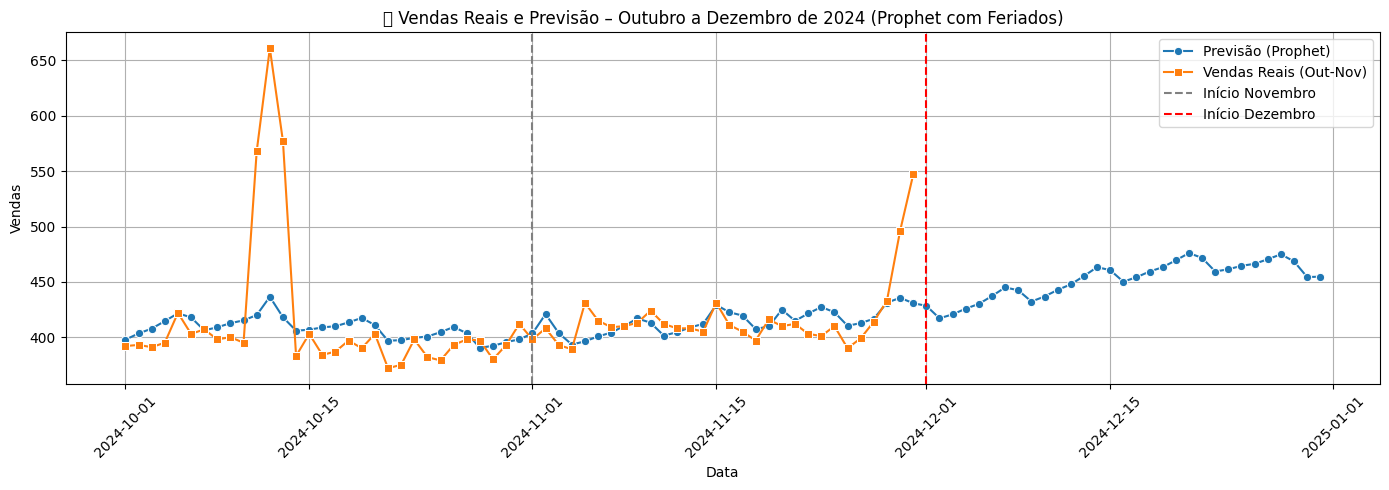

,Data,Previsão
1004,2024-10-01,397.754672
1005,2024-10-02,403.351859
1006,2024-10-03,407.738992
1007,2024-10-04,414.505920
1008,2024-10-05,421.591456
...,...,...
1091,2024-12-27,470.414720
1092,2024-12-28,474.854330
1093,2024-12-29,468.537785
1094,2024-12-30,454.353358


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Previsão'].plot(kind='hist', bins=20, title='Previsão')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Previsão', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['Previsão']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('Previsão')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Data']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Data'}, axis=1)
              .sort_values('Data', ascending=True))
  xs = counted['Data']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Previsão']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Previsão')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Previsão'].plot(kind='line', figsize=(8, 4), title='Previsão')
plt.gca().spines[['top', 'right']].set_visible(False)

In [52]:
# 📦 Bibliotecas
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# 📥 Dados
df = pd.read_excel("Dados_completos.xlsx")
df_prophet = df[['Data', 'Vendas_Camisetas_básicas_masculinas']].rename(
    columns={'Data': 'ds', 'Vendas_Camisetas_básicas_masculinas': 'y'}
)
df_prophet = df_prophet.sort_values('ds').reset_index(drop=True)

# 🎯 Gerar feriados com base na coluna "Data_Importante" (valores 1 = datas especiais)
feriados = df[df['Data_Importante'] == 1][['Data']].copy()
feriados['holiday'] = 'data_importante'
feriados = feriados.rename(columns={'Data': 'ds'})
feriados['lower_window'] = 0
feriados['upper_window'] = 1


# 📊 Métrica MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 🔁 Validação cruzada com janela deslizante
resultados = []
start_train = pd.to_datetime("2022-01-01")

for i in range(23):
    train_end = start_train + pd.DateOffset(months=12+i) - timedelta(days=1)
    test_start = train_end + timedelta(days=1)
    test_end = test_start + pd.DateOffset(months=1) - timedelta(days=1)

    train = df_prophet[(df_prophet['ds'] >= start_train) & (df_prophet['ds'] <= train_end)]
    test = df_prophet[(df_prophet['ds'] >= test_start) & (df_prophet['ds'] <= test_end)]

    model = Prophet(holidays=feriados)
    model.fit(train)

    future = model.make_future_dataframe(periods=len(test), freq='D')
    forecast = model.predict(future)

    previsoes = forecast[['ds', 'yhat']].merge(test, on='ds')
    y_true = previsoes['y']
    y_pred = previsoes['yhat']

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)

    resultados.append({
        'RUN': i+1,
        'Treino até': train_end.date(),
        'Teste de': test_start.date(),
        'até': test_end.date(),
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    })

df_resultados = pd.DataFrame(resultados)

# 🔮 Reajuste final com Prophet para prever out-nov-dez/2024
modelo_final = Prophet(holidays=feriados)
modelo_final.fit(df_prophet)

# Prever de 01/10/2024 até 31/12/2024 → 92 dias
futuro_final = modelo_final.make_future_dataframe(periods=92, freq='D')
forecast_final = modelo_final.predict(futuro_final)

# 📅 Filtrar previsão apenas para outubro, novembro e dezembro de 2024
previsao_out_nov_dez = forecast_final[
    (forecast_final['ds'] >= '2024-10-01') & (forecast_final['ds'] <= '2024-12-31')
][['ds', 'yhat']].rename(columns={'ds': 'Data', 'yhat': 'Previsão'})

# 🔁 Juntar com valores reais disponíveis (out-nov)
previsao_merged = previsao_out_nov_dez.merge(df_prophet, left_on='Data', right_on='ds', how='left')

# 📊 Gráfico comparativo com real (out-nov) e previsão (dez)
plt.figure(figsize=(14, 5))
sns.lineplot(data=previsao_merged, x='Data', y='Previsão', label='Previsão (Prophet)', marker='o')
sns.lineplot(data=previsao_merged, x='Data', y='y', label='Vendas Reais (Out-Nov)', marker='s')
plt.axvline(pd.to_datetime("2024-11-01"), color='gray', linestyle='--', label='Início Novembro')
plt.axvline(pd.to_datetime("2024-12-01"), color='red', linestyle='--', label='Início Dezembro')
plt.title('📈 Vendas Reais e Previsão – Outubro a Dezembro de 2024 (Prophet com Feriados)')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Tabela final com previsões de outubro a dezembro
previsao_out_nov_dez

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


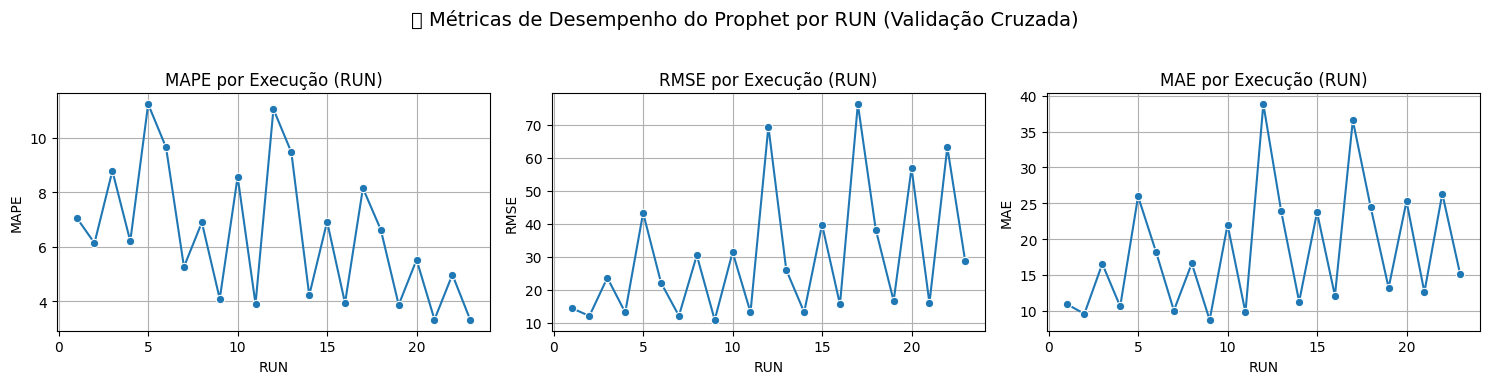

In [53]:
# 🔁 Gráficos das 23 execuções com Prophet já rodado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))
for i, metrica in enumerate(['MAPE', 'RMSE', 'MAE']):
    plt.subplot(1, 3, i+1)
    sns.lineplot(data=df_resultados, x='RUN', y=metrica, marker='o')
    plt.title(f'{metrica} por Execução (RUN)')
    plt.xlabel('RUN')
    plt.ylabel(metrica)
    plt.grid(True)

plt.suptitle('📈 Métricas de Desempenho do Prophet por RUN (Validação Cruzada)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

===== Iniciando a Otimização de Hiperparâmetros para Random Forest =====
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- Resultados da Otimização de Hiperparâmetros para Random Forest ---
Melhores Hiperparâmetros: {'max_features': 1.0, 'min_samples_leaf': 5, 'n_estimators': 200}
Melhor MAE (Otimização): 28.43

===== Iniciando a Validação Cruzada Comparativa com Modelos Otimizados =====

--- Processando Iteração 1 de 5 ---
  Treinando e avaliando Random Forest (Otimizado)...
  Treinando e avaliando KNN...
  Treinando e avaliando SVM...

--- Processando Iteração 2 de 5 ---
  Treinando e avaliando Random Forest (Otimizado)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


  Treinando e avaliando KNN...
  Treinando e avaliando SVM...

--- Processando Iteração 3 de 5 ---
  Treinando e avaliando Random Forest (Otimizado)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


  Treinando e avaliando KNN...
  Treinando e avaliando SVM...

--- Processando Iteração 4 de 5 ---
  Treinando e avaliando Random Forest (Otimizado)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


  Treinando e avaliando KNN...
  Treinando e avaliando SVM...

--- Processando Iteração 5 de 5 ---
  Treinando e avaliando Random Forest (Otimizado)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


  Treinando e avaliando KNN...
  Treinando e avaliando SVM...

--- Resultados Médios da Validação Cruzada por Modelo ---

Modelo: Random Forest (Otimizado)
  MAE Médio: 22.92 (+/- 4.80)
  RMSE Médio: 35.69 (+/- 8.95)
  MAPE Médio: 9.15% (+/- 1.64%)

Modelo: KNN
  MAE Médio: 43.26 (+/- 11.09)
  RMSE Médio: 55.79 (+/- 14.03)
  MAPE Médio: 17.36% (+/- 3.38%)

Modelo: SVM
  MAE Médio: 54.43 (+/- 28.08)
  RMSE Médio: 68.65 (+/- 31.28)
  MAPE Médio: 19.99% (+/- 6.13%)

Modelo: Naive
  MAE Médio: 43.96 (+/- 11.88)
  RMSE Médio: 58.13 (+/- 15.61)
  MAPE Médio: 17.74% (+/- 4.92%)

Modelo: Média Móvel
  MAE Médio: 38.40 (+/- 13.29)
  RMSE Médio: 49.93 (+/- 14.76)
  MAPE Médio: 15.62% (+/- 4.41%)

Modelo: Suavização Exponencial Simples
  MAE Médio: 39.39 (+/- 10.05)
  RMSE Médio: 54.35 (+/- 14.75)
  MAPE Médio: 15.63% (+/- 4.45%)


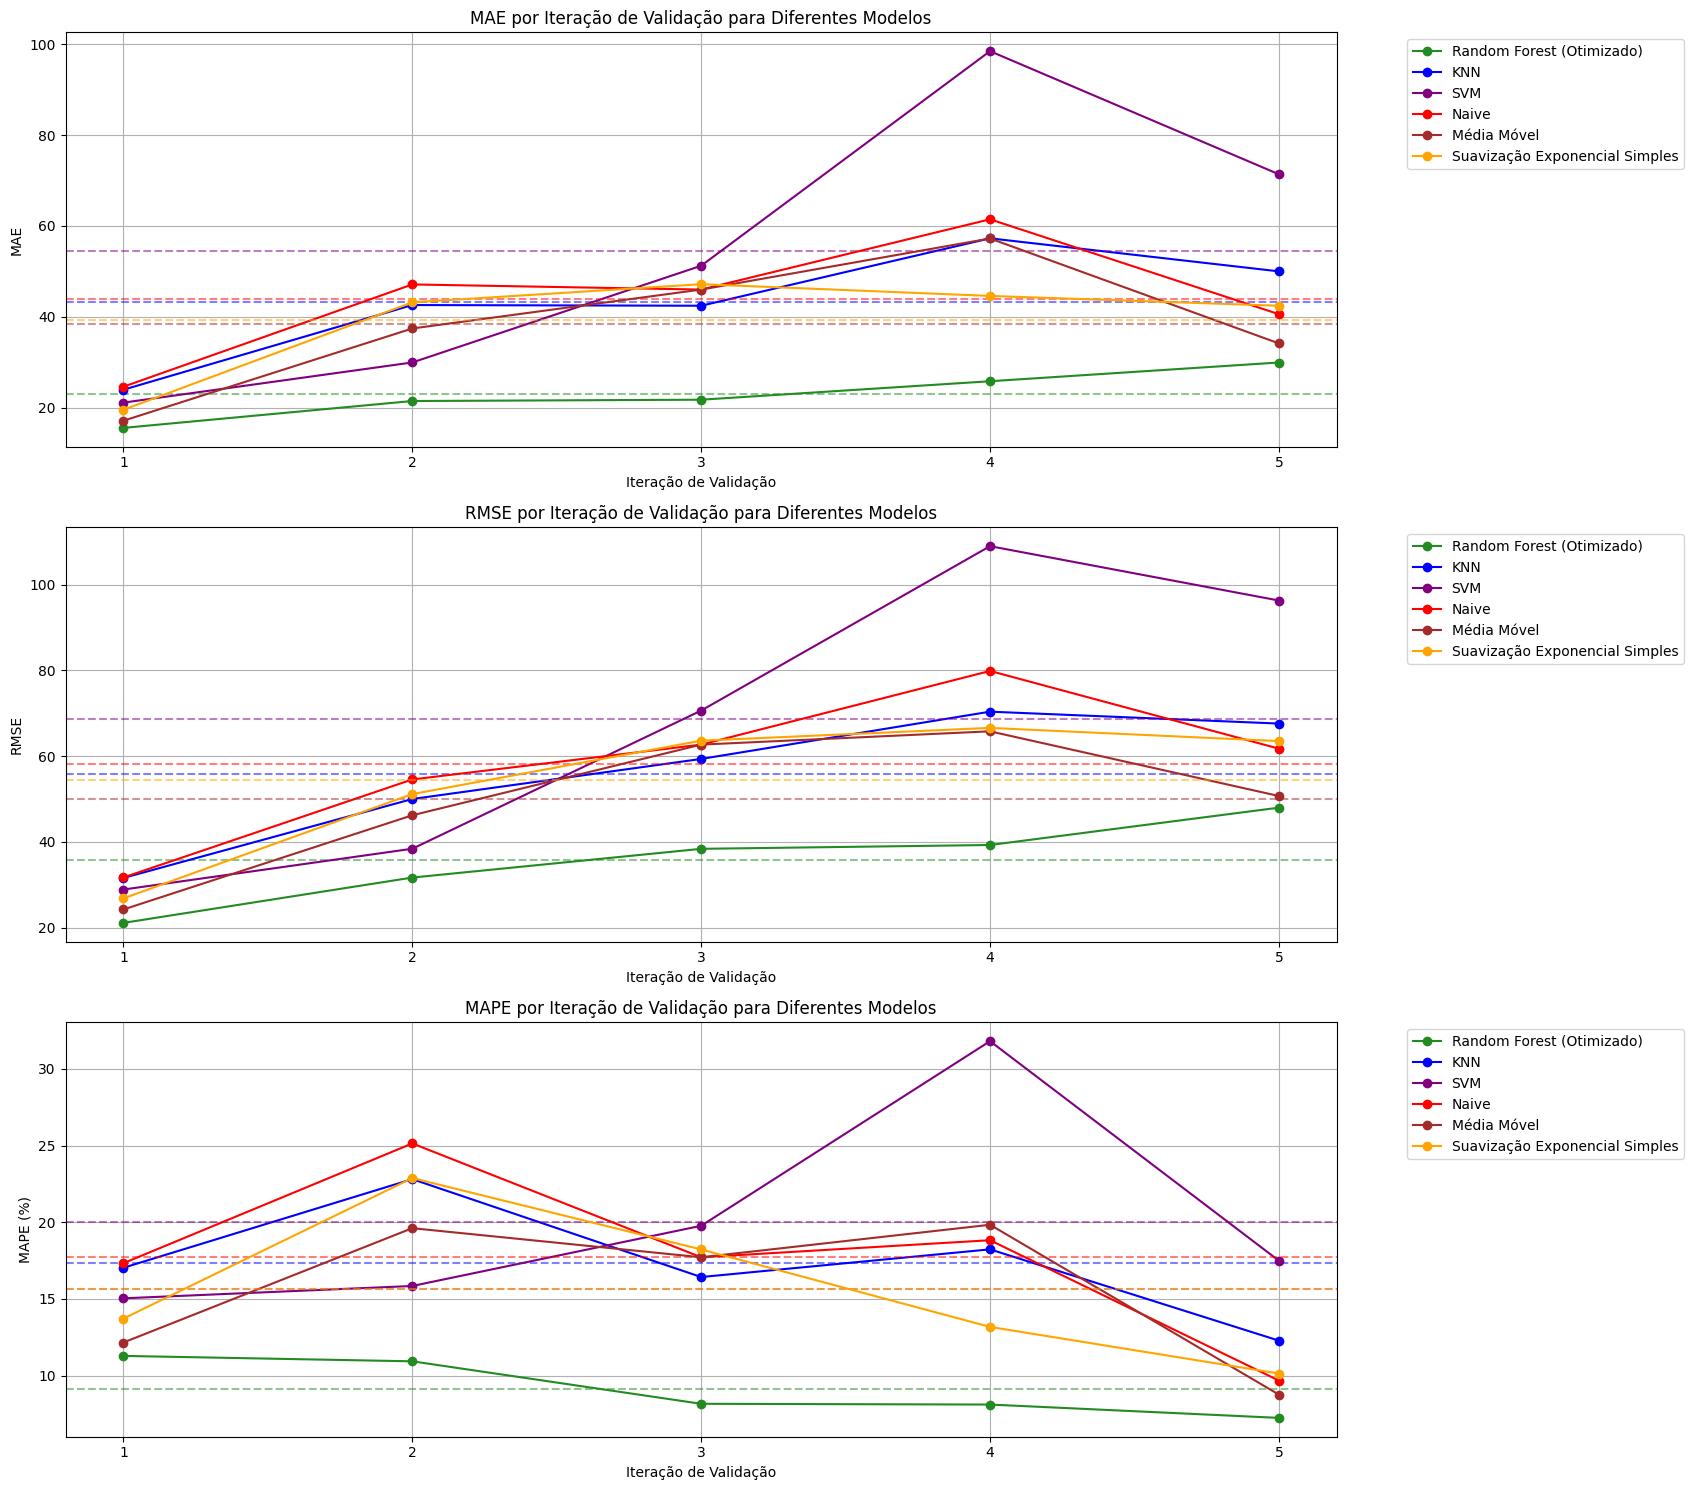

In [56]:
# Instalar bibliotecas necessárias (se ainda não estiverem instaladas no Colab)
# !pip install pandas numpy scikit-learn matplotlib seaborn statsmodels openpyxl

# 1. Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Modelos ML
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Modelos Estatísticos
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Métricas de erro
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

# 2. Funções para cálculo das métricas de erro
def calcular_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calcular_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def calcular_mape(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)

    non_zero_mask = y_true_np != 0
    if np.any(non_zero_mask):
        mape_values = np.abs((y_true_np[non_zero_mask] - y_pred_np[non_zero_mask]) / y_true_np[non_zero_mask])
        return np.mean(mape_values) * 100
    else:
        return np.nan

# --- SEÇÃO PARA CARREGAR SEUS DADOS ---

# NOME DO SEU NOVO ARQUIVO DE PLANILHA
file_name = 'Dados_completos.xlsx' # ALTERADO PARA O NOVO NOME DE ARQUIVO

# ATENÇÃO: Certifique-se de que o arquivo foi carregado para o ambiente do Colab.
# Se você fez upload via files.upload():
# from google.colab import files
# uploaded = files.upload()
# file_name_uploaded = list(uploaded.keys())[0]
# df = pd.read_excel(file_name_uploaded) # Ou pd.read_csv(file_name_uploaded)

# Se sua planilha estiver no Google Drive e você já montou o Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_excel(f'/content/drive/MyDrive/SeuCaminhoDaPasta/{file_name}')

# --- REMOVIDO: Exemplo de carregamento de um arquivo dummy para testar sem a sua planilha ---
# O código agora espera que você carregue 'Dados_completos.xlsx'

# Exemplo de carregamento, assumindo que o arquivo já foi carregado para o ambiente do Colab ou Drive
try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_name}' não foi encontrado. Por favor, faça upload do arquivo ou verifique o caminho.")
    # Se você está no Colab, use as linhas abaixo para upload (descomente e execute):
    # from google.colab import files
    # uploaded = files.upload()
    # file_name_uploaded = list(uploaded.keys())[0]
    # df = pd.read_excel(file_name_uploaded)
    exit() # Interrompe a execução se o arquivo não for encontrado

# Assegure-se que a coluna 'Data' está em formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# Filtrar dados a partir de janeiro de 2022 (ou ajustar conforme necessário para o novo dataset)
# Você pode precisar ajustar a data de início dependendo da granularidade dos seus dados completos
df_filtered = df[df['Data'] >= '2022-01-01'].copy()

if df_filtered.empty:
    print("Não há dados após o filtro de janeiro de 2022. Verifique sua coluna 'Data' e o filtro.")
else:
    # DEFINIR NOVA VARIÁVEL ALVO E NOVAS FEATURES
    target_column = 'Vendas_Camisetas_básicas_masculinas' # ALTERADO PARA A NOVA COLUNA ALVO

    # LISTA COMPLETA DE FEATURES CONFORME SOLICITADO
    features = [
        'Ano', 'Mês', 'Dia',
        'Dia_da_Semana', # Assumindo que Dia_da_Semana é uma coluna numérica ou categórica já codificada
        'Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira',
        'Quinta-feira', 'Sexta-feira', 'Sábado',
        'Data_Importante', # Assumindo que é uma feature numérica ou booleana
        'Vendas_Lag1', 'Vendas_Lag2', 'Vendas_Lag3', 'Vendas_Lag4',
        'Vendas_Lag5', 'Vendas_Lag6', 'Vendas_Lag7', 'Vendas_Lag8',
        'Vendas_Lag9', 'Vendas_Lag10', 'Vendas_Lag11', 'Vendas_Lag12',
        'Vendas_Lag13', 'Vendas_Lag14', 'Vendas_Lag15'
    ]

    features_present = [f for f in features if f in df_filtered.columns]
    if len(features_present) < len(features):
        missing_features = set(features) - set(features_present)
        print(f"Aviso: As seguintes colunas de feature não foram encontradas no DataFrame e serão ignoradas: {missing_features}")

    # Tratamento de NaNs em features (especialmente importante para Lags)
    # Valores NaN em lags geralmente ocorrem no início da série.
    # Podemos preencher com 0, com a média ou remover as linhas.
    # Remover NaNs pode ser a melhor opção para garantir dados completos para todos os lags.
    df_filtered_processed = df_filtered.dropna(subset=features_present + [target_column]).copy()

    if df_filtered_processed.empty:
        print("Após remover linhas com valores ausentes em features ou no target, o DataFrame está vazio. Verifique seus dados.")
        exit()

    X = df_filtered_processed[features_present]
    y = df_filtered_processed[target_column]

    # Escalar os dados - Aplicamos o scaler ao X completo
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ==============================================================================
    #                      Otimização de Hiperparâmetros para Random Forest
    # ==============================================================================

    print("===== Iniciando a Otimização de Hiperparâmetros para Random Forest =====")

    rf_model_for_tuning = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Definir a grade de hiperparâmetros para buscar (mantida a mesma)
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_features': [0.7, 1.0],
        'min_samples_leaf': [1, 5]
    }

    # Usar TimeSeriesSplit para a validação cruzada da busca de hiperparâmetros
    tscv_tuning = TimeSeriesSplit(n_splits=3)

    mae_scorer_tuning = make_scorer(mean_absolute_error, greater_is_better=False)

    grid_search_rf = GridSearchCV(
        estimator=rf_model_for_tuning,
        param_grid=param_grid_rf,
        cv=tscv_tuning,
        scoring=mae_scorer_tuning,
        n_jobs=-1,
        verbose=1
    )

    grid_search_rf.fit(X_scaled, y)

    print("\n--- Resultados da Otimização de Hiperparâmetros para Random Forest ---")
    print(f"Melhores Hiperparâmetros: {grid_search_rf.best_params_}")
    print(f"Melhor MAE (Otimização): {-grid_search_rf.best_score_:.2f}")

    best_rf_model = grid_search_rf.best_estimator_

    # ==============================================================================
    #                      Validação Cruzada Comparativa com Modelos Otimizados
    # ==============================================================================

    print("\n===== Iniciando a Validação Cruzada Comparativa com Modelos Otimizados =====")

    ml_models = {
        'Random Forest (Otimizado)': best_rf_model,
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'SVM': SVR(kernel='rbf', C=100, gamma=0.1)
    }

    M_window = 7 # Janela de 7 dias para a média móvel

    tscv_comparison = TimeSeriesSplit(n_splits=5)

    all_mae_scores = {}
    all_rmse_scores = {}
    all_mape_scores = {}

    model_names_to_compare = list(ml_models.keys()) + ['Naive', 'Média Móvel', 'Suavização Exponencial Simples']
    for name in model_names_to_compare:
        all_mae_scores[name] = []
        all_rmse_scores[name] = []
        all_mape_scores[name] = []

    for iteration, (train_index, test_index) in enumerate(tscv_comparison.split(X_scaled), 1):
        print(f"\n--- Processando Iteração {iteration} de {tscv_comparison.n_splits} ---")

        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # --- Modelos de Machine Learning ---
        for name, model in ml_models.items():
            print(f"  Treinando e avaliando {name}...")
            # Verifica se há NaNs nas features de treino para o modelo ML
            if np.isnan(X_train_fold).any():
                print(f"    Aviso: NaNs encontrados em X_train_fold para {name}. Isso pode afetar o treino.")
                # Opção: Preencher NaNs aqui, se eles puderem surgir após o dropna inicial
                # X_train_fold = np.nan_to_num(X_train_fold)

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)

            all_mae_scores[name].append(calcular_mae(y_test_fold, y_pred))
            all_rmse_scores[name].append(calcular_rmse(y_test_fold, y_pred))
            all_mape_scores[name].append(calcular_mape(y_test_fold, y_pred))

        # --- Modelos Estatísticos ---
        if not y_train_fold.empty:
            last_train_value = y_train_fold.iloc[-1]
            y_pred_naive = np.full_like(y_test_fold, last_train_value)
        else:
            y_pred_naive = np.zeros_like(y_test_fold)
            print(f"  Aviso: Conjunto de treino vazio na Iteração {iteration} para Naive. Previsão será zero.")

        all_mae_scores['Naive'].append(calcular_mae(y_test_fold, y_pred_naive))
        all_rmse_scores['Naive'].append(calcular_rmse(y_test_fold, y_pred_naive))
        all_mape_scores['Naive'].append(calcular_mape(y_test_fold, y_pred_naive))

        if len(y_train_fold) >= M_window:
            last_ma_value = y_train_fold.rolling(window=M_window).mean().iloc[-1]
            y_pred_ma = np.full_like(y_test_fold, last_ma_value)
        else:
            last_ma_value = y_train_fold.mean() if not y_train_fold.empty else 0
            y_pred_ma = np.full_like(y_test_fold, last_ma_value)
            print(f"  Aviso: Não há dados suficientes para janela {M_window} na Iteração {iteration} para Média Móvel. Usando a média do treino.")

        all_mae_scores['Média Móvel'].append(calcular_mae(y_test_fold, y_pred_ma))
        all_rmse_scores['Média Móvel'].append(calcular_rmse(y_test_fold, y_pred_ma))
        all_mape_scores['Média Móvel'].append(calcular_mape(y_test_fold, y_pred_ma))

        if not y_train_fold.empty:
            try:
                ses_model = SimpleExpSmoothing(y_train_fold, initialization_method="estimated")
                ses_fit = ses_model.fit()
                y_pred_ses = ses_fit.forecast(len(y_test_fold))
            except Exception as e:
                print(f"  Erro ao ajustar SES na Iteração {iteration}: {e}. Previsão será zeros.")
                y_pred_ses = np.zeros_like(y_test_fold)
        else:
            y_pred_ses = np.zeros_like(y_test_fold)
            print(f"  Aviso: Conjunto de treino vazio na Iteração {iteration} para SES. Previsão será zeros.")

        all_mae_scores['Suavização Exponencial Simples'].append(calcular_mae(y_test_fold, y_pred_ses))
        all_rmse_scores['Suavização Exponencial Simples'].append(calcular_rmse(y_test_fold, y_pred_ses))
        all_mape_scores['Suavização Exponencial Simples'].append(calcular_mape(y_test_fold, y_pred_ses))


    # ==============================================================================
    #                      Exibir Médias e Desvios Padrão dos Erros
    # ==============================================================================
    print("\n--- Resultados Médios da Validação Cruzada por Modelo ---")
    for model_name in model_names_to_compare:
        print(f"\nModelo: {model_name}")
        print(f"  MAE Médio: {np.mean(all_mae_scores[model_name]):.2f} (+/- {np.std(all_mae_scores[model_name]):.2f})")
        print(f"  RMSE Médio: {np.mean(all_rmse_scores[model_name]):.2f} (+/- {np.std(all_rmse_scores[model_name]):.2f})")
        print(f"  MAPE Médio: {np.mean(all_mape_scores[model_name]):.2f}% (+/- {np.std(all_mape_scores[model_name]):.2f}%)")

    # ==============================================================================
    #                      Gráfico Comparativo dos Erros por Iteração de Validação
    # ==============================================================================

    model_colors = {
        'Random Forest (Otimizado)': 'forestgreen',
        'KNN': 'blue',
        'SVM': 'purple',
        'Naive': 'red',
        'Média Móvel': 'brown',
        'Suavização Exponencial Simples': 'orange' ,
        'Prophet': 'teal'
    }

    plt.figure(figsize=(18, 15))
    iterations_range = range(1, tscv_comparison.n_splits + 1)

    # Subplot para MAE
    plt.subplot(3, 1, 1)
    for model_name in model_names_to_compare:
        scores = all_mae_scores[model_name]
        plt.plot(iterations_range, scores, marker='o', linestyle='-',
                 color=model_colors.get(model_name, 'gray'), label=model_name)
        plt.axhline(y=np.mean(scores), color=model_colors.get(model_name, 'gray'), linestyle='--', alpha=0.5)
    plt.title('MAE por Iteração de Validação para Diferentes Modelos')
    plt.xlabel('Iteração de Validação')
    plt.ylabel('MAE')
    plt.xticks(iterations_range)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Subplot para RMSE
    plt.subplot(3, 1, 2)
    for model_name in model_names_to_compare:
        scores = all_rmse_scores[model_name]
        plt.plot(iterations_range, scores, marker='o', linestyle='-',
                 color=model_colors.get(model_name, 'gray'), label=model_name)
        plt.axhline(y=np.mean(scores), color=model_colors.get(model_name, 'gray'), linestyle='--', alpha=0.5)
    plt.title('RMSE por Iteração de Validação para Diferentes Modelos')
    plt.xlabel('Iteração de Validação')
    plt.ylabel('RMSE')
    plt.xticks(iterations_range)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Subplot para MAPE
    plt.subplot(3, 1, 3)
    for model_name in model_names_to_compare:
        scores = all_mape_scores[model_name]
        plt.plot(iterations_range, scores, marker='o', linestyle='-',
                 color=model_colors.get(model_name, 'gray'), label=model_name)
        plt.axhline(y=np.mean(scores), color=model_colors.get(model_name, 'gray'), linestyle='--', alpha=0.5)
    plt.title('MAPE por Iteração de Validação para Diferentes Modelos')
    plt.xlabel('Iteração de Validação')
    plt.ylabel('MAPE (%)')
    plt.xticks(iterations_range)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.95, 1])
    plt.show()

/tmp/ipython-input-55-3493767808.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=df_mae, palette=model_colors_updated)
/tmp/ipython-input-55-3493767808.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=df_rmse, palette=model_colors_updated)
/tmp/ipython-input-55-3493767808.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE', data=df_mape, palette=model_colors_updated)


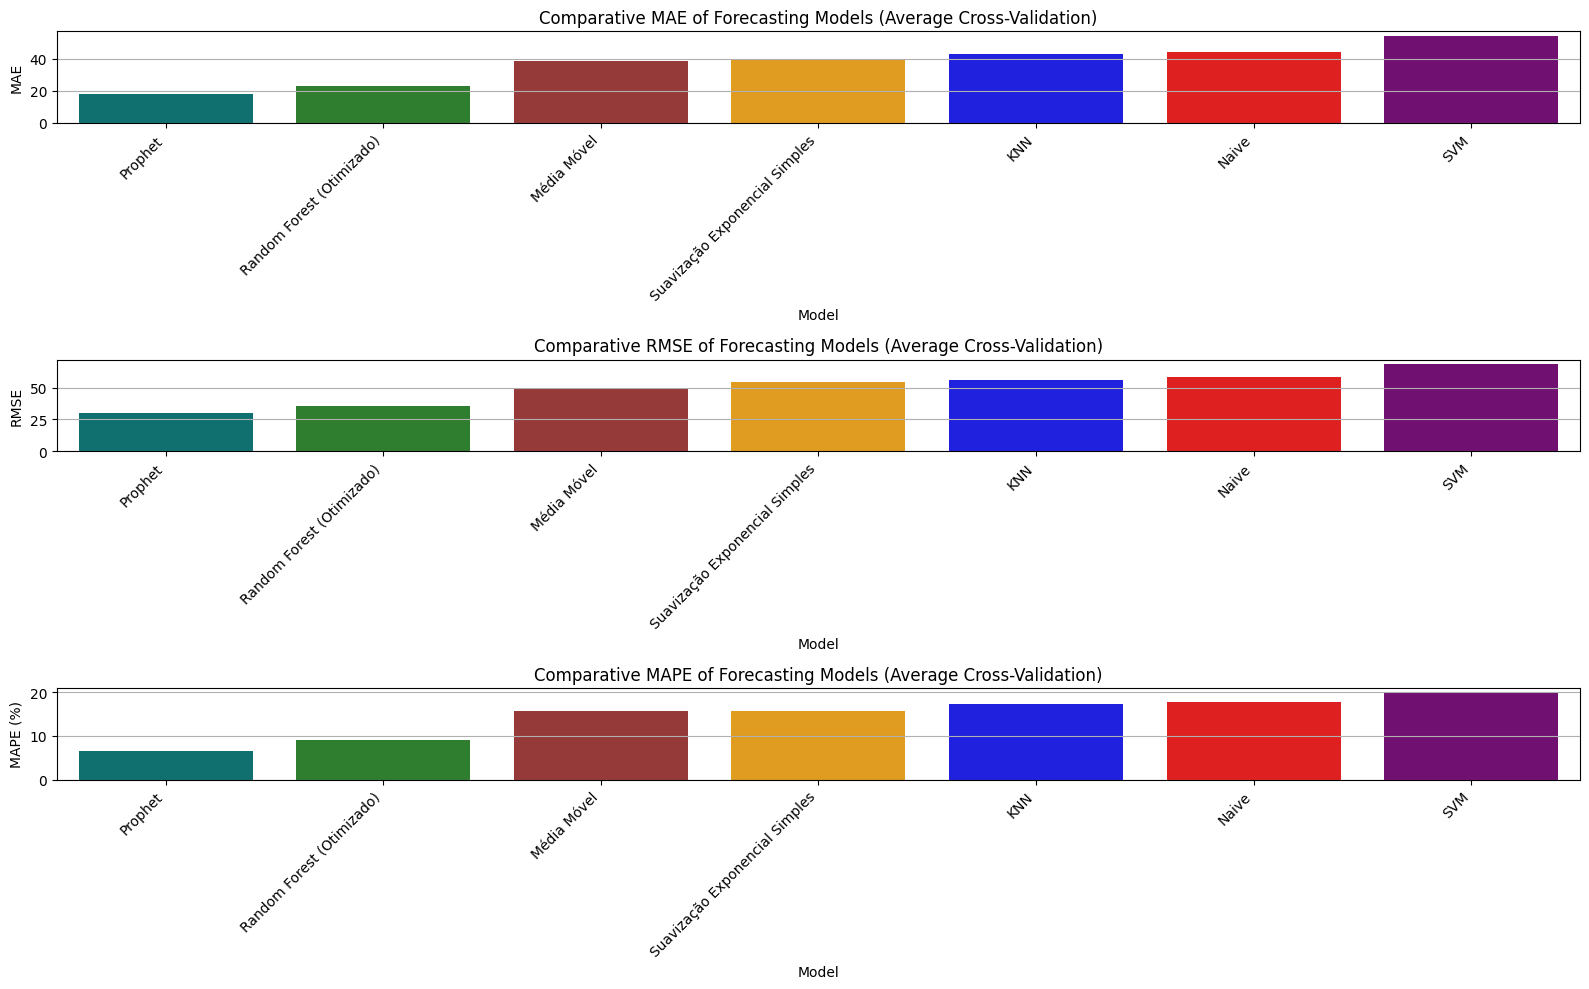

In [55]:
# Consolidate average metrics from previous runs

# Metrics from the comparative validation cell (wxoTOaPKxDCk)
ml_stats_models_mae = {name: np.mean(scores) for name, scores in all_mae_scores.items()}
ml_stats_models_rmse = {name: np.mean(scores) for name, scores in all_rmse_scores.items()}
ml_stats_models_mape = {name: np.mean(scores) for name, scores in all_mape_scores.items()}

# Metrics from the Prophet cross-validation cell (m1EMVMIQS4HD)
# Using the overall average from the df_resultados DataFrame
prophet_mae = df_resultados['MAE'].mean()
prophet_rmse = df_resultados['RMSE'].mean()
prophet_mape = df_resultados['MAPE'].mean()

# Add Prophet metrics to the dictionaries
ml_stats_models_mae['Prophet'] = prophet_mae
ml_stats_models_rmse['Prophet'] = prophet_rmse
ml_stats_models_mape['Prophet'] = prophet_mape

# Create DataFrames for easy plotting
df_mae = pd.DataFrame(list(ml_stats_models_mae.items()), columns=['Model', 'MAE'])
df_rmse = pd.DataFrame(list(ml_stats_models_rmse.items()), columns=['Model', 'RMSE'])
df_mape = pd.DataFrame(list(ml_stats_models_mape.items()), columns=['Model', 'MAPE'])

# Sort by MAE for consistent ordering in plots (optional, but good practice)
df_mae = df_mae.sort_values('MAE')
model_order = df_mae['Model'].tolist() # Get the order of models based on MAE
df_rmse = df_rmse.set_index('Model').loc[model_order].reset_index() # Reorder RMSE DataFrame
df_mape = df_mape.set_index('Model').loc[model_order].reset_index() # Reorder MAPE DataFrame


# Define colors based on the user's request and add Prophet
model_colors_updated = {
    'Random Forest (Otimizado)': 'forestgreen',
    'KNN': 'blue',
    'SVM': 'purple',
    'Naive': 'red',
    'Média Móvel': 'brown',
    'Suavização Exponencial Simples': 'orange',
    'Prophet': 'teal' # Added Prophet color
}

# 📊 Create the comparative plot
plt.figure(figsize=(16, 10))

# MAE plot
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='MAE', data=df_mae, palette=model_colors_updated)
plt.title('Comparative MAE of Forecasting Models (Average Cross-Validation)')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')


# RMSE plot
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='RMSE', data=df_rmse, palette=model_colors_updated)
plt.title('Comparative RMSE of Forecasting Models (Average Cross-Validation)')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')


# MAPE plot
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='MAPE', data=df_mape, palette=model_colors_updated)
plt.title('Comparative MAPE of Forecasting Models (Average Cross-Validation)')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()